In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [259]:

cell2cellholdout = pd.read_csv('./cell2cellholdout.csv', encoding='UTF-8')
cell2celltrain = pd.read_csv('./cell2celltrain.csv', encoding='utf-8')

In [260]:
cell2celltrain

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [261]:
cell2celltrain.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [262]:
cell2celltrain.isnull().sum()
cell2celltrain[cell2celltrain.isnull().any(axis=1)][['CustomerID','MonthsInService','Churn','MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues']]

,CustomerID,MonthsInService,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues
62,3000410,54,Yes,90.25,952.0,50.0,0.00,161.0,0.0,308.0,51.2
87,3000598,49,No,122.00,1806.0,75.0,15.59,146.0,1.0,-156.0,-32.8
91,3000626,53,No,96.04,545.0,60.0,0.66,111.0,1.1,NaN,NaN
122,3000898,55,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,3000926,49,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
51039,3399922,30,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0
51042,3399958,29,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51044,3399978,25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51045,3399990,31,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
cell2celltrain

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [264]:
# 결측치 삭제 
df_all = cell2celltrain.dropna().copy()

In [265]:
np.unique(df_all['Churn'], return_counts=True)

(array(['No', 'Yes'], dtype=object), array([35507, 14245]))

## Churn : 이탈여부 object(no, yes) -> 숫자(0, 1) 라벨링 

In [266]:
np.unique(df_all['Churn'], return_counts=True)
mapping = {'No': 0.0, 'Yes': 1.0} # 유지 0, 이탈 1
df_all['Churn'] = df_all['Churn'].map(mapping)

# df 분리 
### billing_usage : 요금 및 사용량 정보
### call_stats : 통화사용 정보 
### handset_details : 장치 정보 
### customer_profile : 고객 프로필 정보 
### customer_lifestyle : 고객 라이프스타일 정보 
### customer_churn : 이탈 및 관리정보 


In [267]:

billing_usage = df_all[['CustomerID', 'MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues','Churn']].copy()
call_stats = df_all[['CustomerID','DirectorAssistedCalls','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','Churn']].copy()
handset_details = df_all[['CustomerID','Handsets','HandsetModels','CurrentEquipmentDays','HandsetRefurbished','HandsetWebCapable','Churn']].copy()
customer_profile = df_all[['CustomerID','AgeHH1','AgeHH2','ChildrenInHH','IncomeGroup','PrizmCode','Occupation','MaritalStatus','Churn']].copy()
customer_lifestyle = df_all[['CustomerID','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','OwnsMotorcycle','Churn']].copy()
customer_churn = df_all[['CustomerID','MonthsInService','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser','NotNewCellphoneUser','ReferralsMadeBySubscriber','AdjustmentsToCreditRating','HandsetPrice','MadeCallToRetentionTeam','CreditRating','Churn']].copy()
# 관계성 보기 위해 모든 df_all 에 Churn 추가



# 테이블 별 상관관계 시각화

### billing_usage : 요금 및 사용량 정보
- CustomerID: 고객 고유 식별자 (Unique Identifier).
- MonthlyRevenue: 월별 매출 (고객이 매달 지불하는 금액).
- MonthlyMinutes: 월별 사용 시간 (통화 시간, 분 단위).
- TotalRecurringCharge: 월 기본 요금 (정기적으로 청구되는 요금).
- OverageMinutes: 초과 통화 시간 (기본 제공 시간을 초과한 통화 분).
- RoamingCalls: 로밍 중에 발생한 통화 횟수.
- PercChangeMinutes: 월간 통화 시간 변화율 (이전 달과 비교한 변화율).
- PercChangeRevenues: 월간 매출 변화율 (이전 달과 비교한 변화율).

In [268]:
billing_usage.dtypes

CustomerID                int64
MonthlyRevenue          float64
MonthlyMinutes          float64
TotalRecurringCharge    float64
OverageMinutes          float64
RoamingCalls            float64
PercChangeMinutes       float64
PercChangeRevenues      float64
Churn                   float64
dtype: object

In [269]:
billing_usage.head(5)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Churn
0,3000002,24.00,219.0,22.0,0.0,0.0,-157.0,-19.0,1.0
1,3000010,16.99,10.0,17.0,0.0,0.0,-4.0,0.0,1.0
2,3000014,38.00,8.0,38.0,0.0,0.0,-2.0,0.0,0.0
3,3000022,82.28,1312.0,75.0,0.0,0.0,157.0,8.1,0.0
4,3000026,17.14,0.0,17.0,0.0,0.0,0.0,-0.2,1.0


<Axes: >

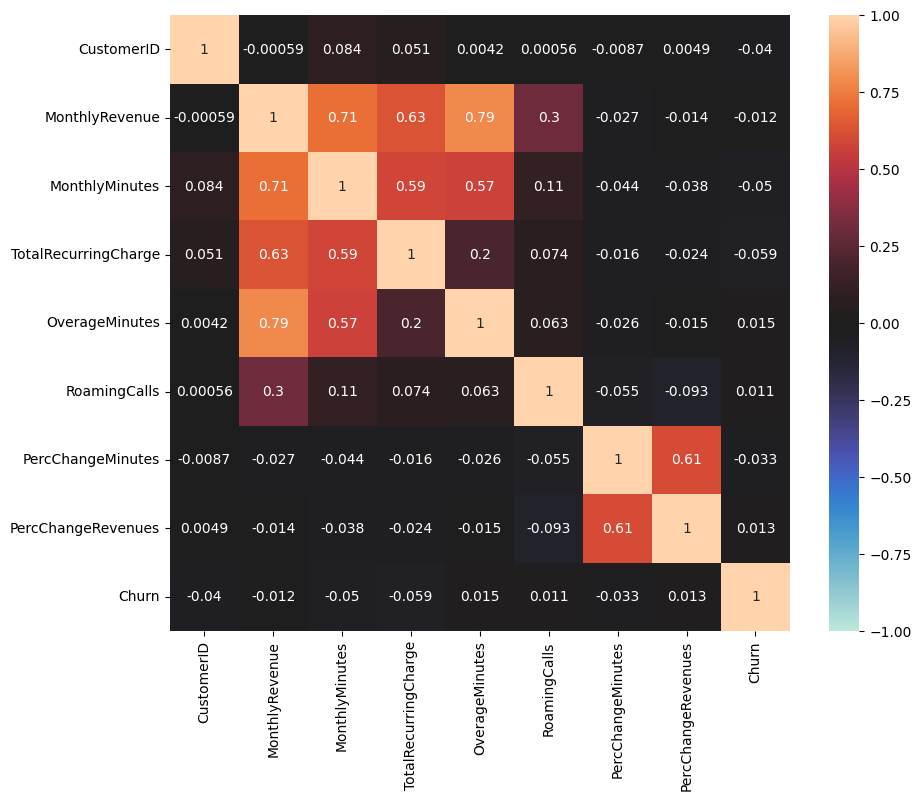

In [270]:
plt.figure(figsize=(10,8))
billing_usage.corr()
sns.heatmap(billing_usage.corr(), vmax=1, vmin=-1, center=0, annot=True)

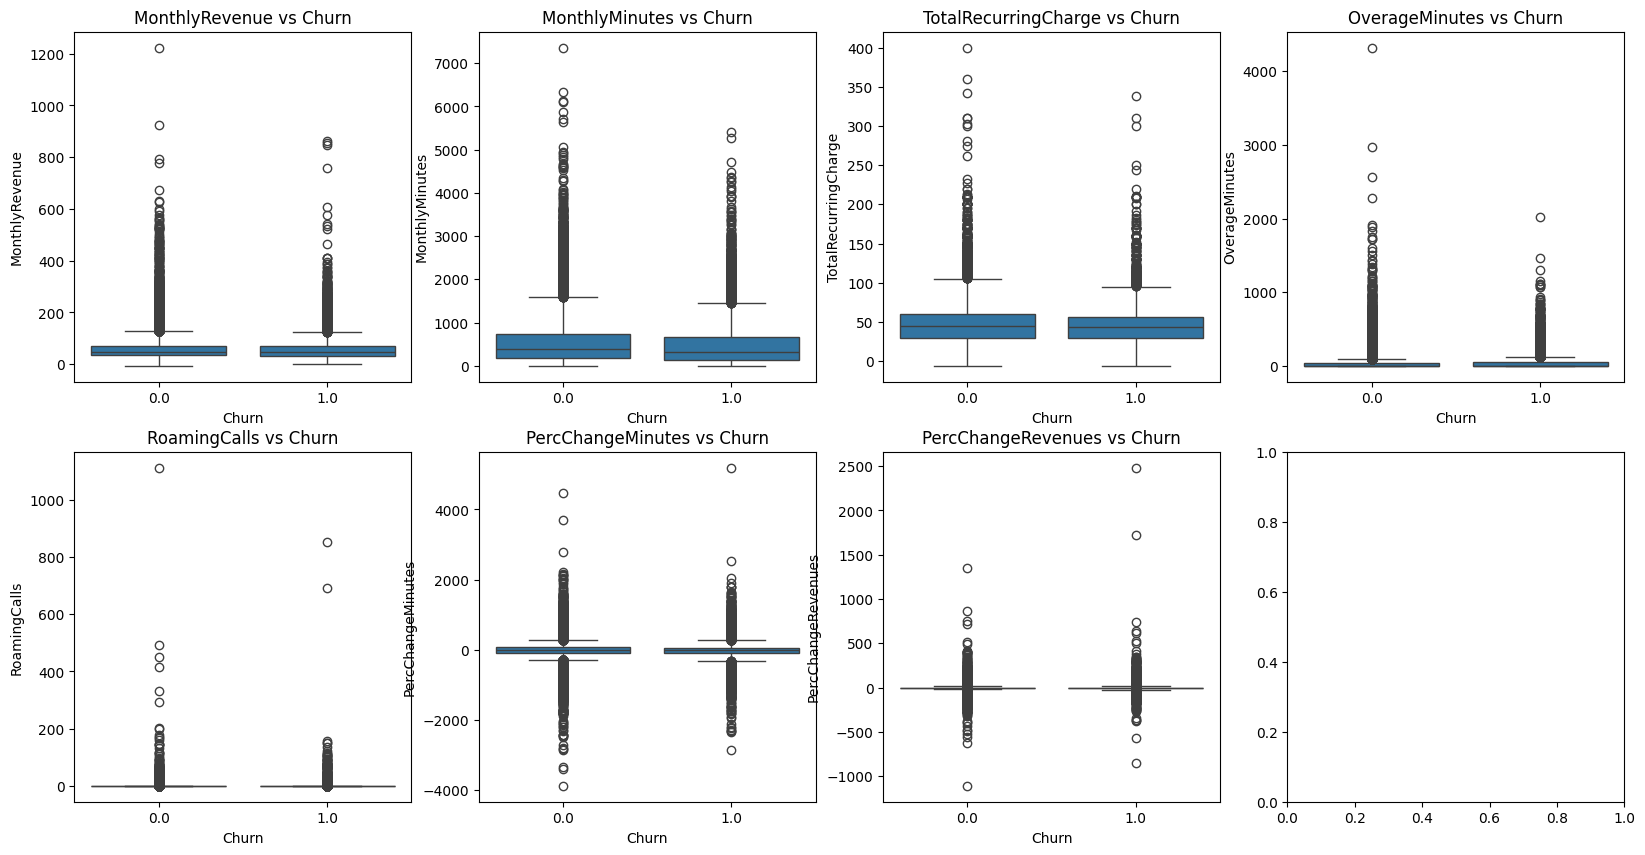

In [271]:
columns = [col for col in billing_usage.columns if (col != 'CustomerID' and col != 'Churn')] #7
num_cols = 4 # 한 줄에 표시할 그래프 개수
num_rows = (len(columns) + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5)) 
axes = axes.flatten() 

# 박스플롯 그리기
for i, col in enumerate(columns):
    ax = axes[i] 
    sns.boxplot(data=billing_usage, x='Churn', y=col, ax=ax)
    ax.set_title(f"{col} vs Churn")

### call_stats : 통화사용 정보 
- CustomerID: 고객 고유 식별자 (Unique Identifier)
- DirectorAssistedCalls: 상담원(직접) 연결된 통화 횟수.
- DroppedCalls: 통화 중 끊긴 횟수.
- BlockedCalls: 연결 실패(차단된) 통화 횟수.
- UnansweredCalls: 받지 않은 통화 횟수.
- CustomerCareCalls: 고객센터에 연결된 통화 횟수.
- ThreewayCalls: 3자 통화 횟수.
- ReceivedCalls: 받은 전화의 총 횟수.
- OutboundCalls: 발신 전화의 총 횟수.
- InboundCalls: 수신 전화의 총 횟수.
- PeakCallsInOut: 피크 시간대(혼잡 시간)의 통화 횟수 (발신/수신).
- OffPeakCallsInOut: 비혼잡 시간대의 통화 횟수 (발신/수신).
- DroppedBlockedCalls: 끊기거나 차단된 통화의 총 횟수.
- CallForwardingCalls: 착신 전환된 통화 횟수.
- CallWaitingCalls: 통화 대기 기능을 사용한 횟수.


In [272]:
call_stats.head(5)

,CustomerID,DirectorAssistedCalls,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,Churn
0,3000002,0.25,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,1.0
1,3000010,0.00,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,1.0
2,3000014,0.00,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,0.0
3,3000022,1.24,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,0.0
4,3000026,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

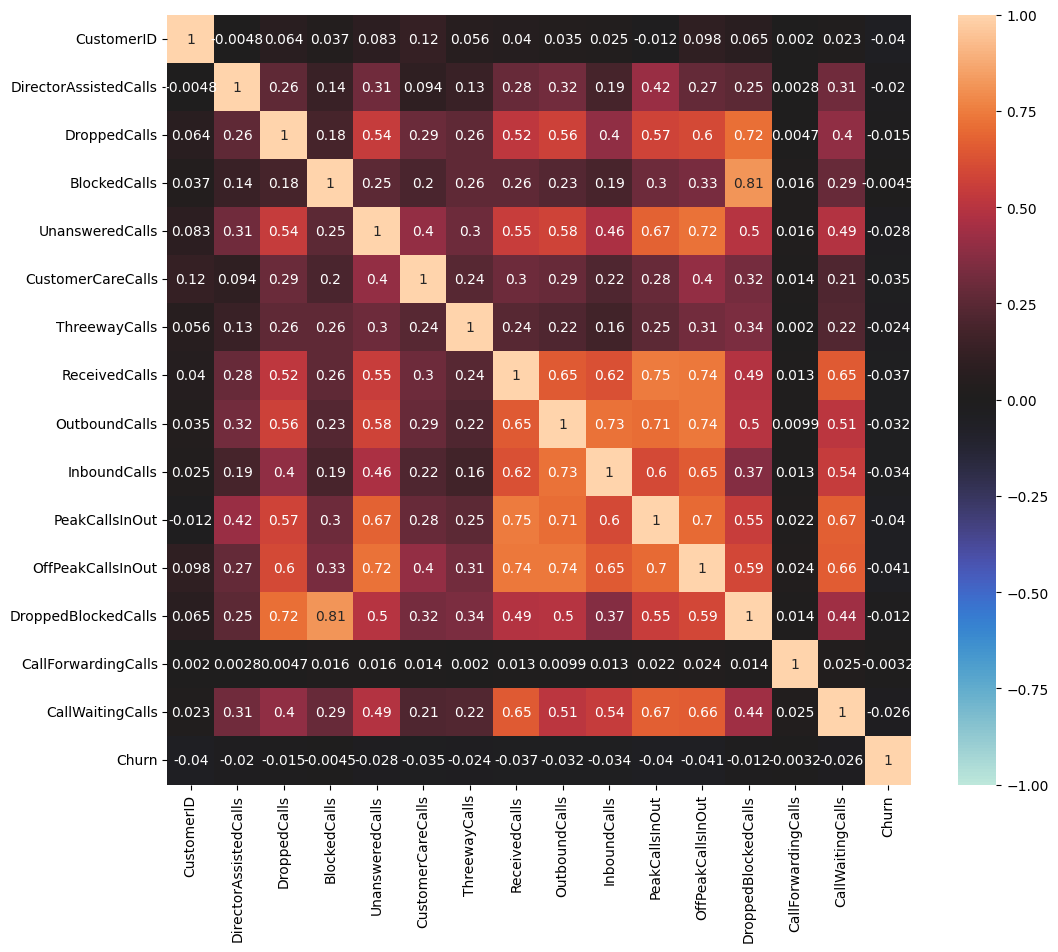

In [273]:
call_stats.dtypes
plt.figure(figsize=(12,10))
sns.heatmap(call_stats.corr(), vmax=1, vmin=-1, center=0, annot=True)

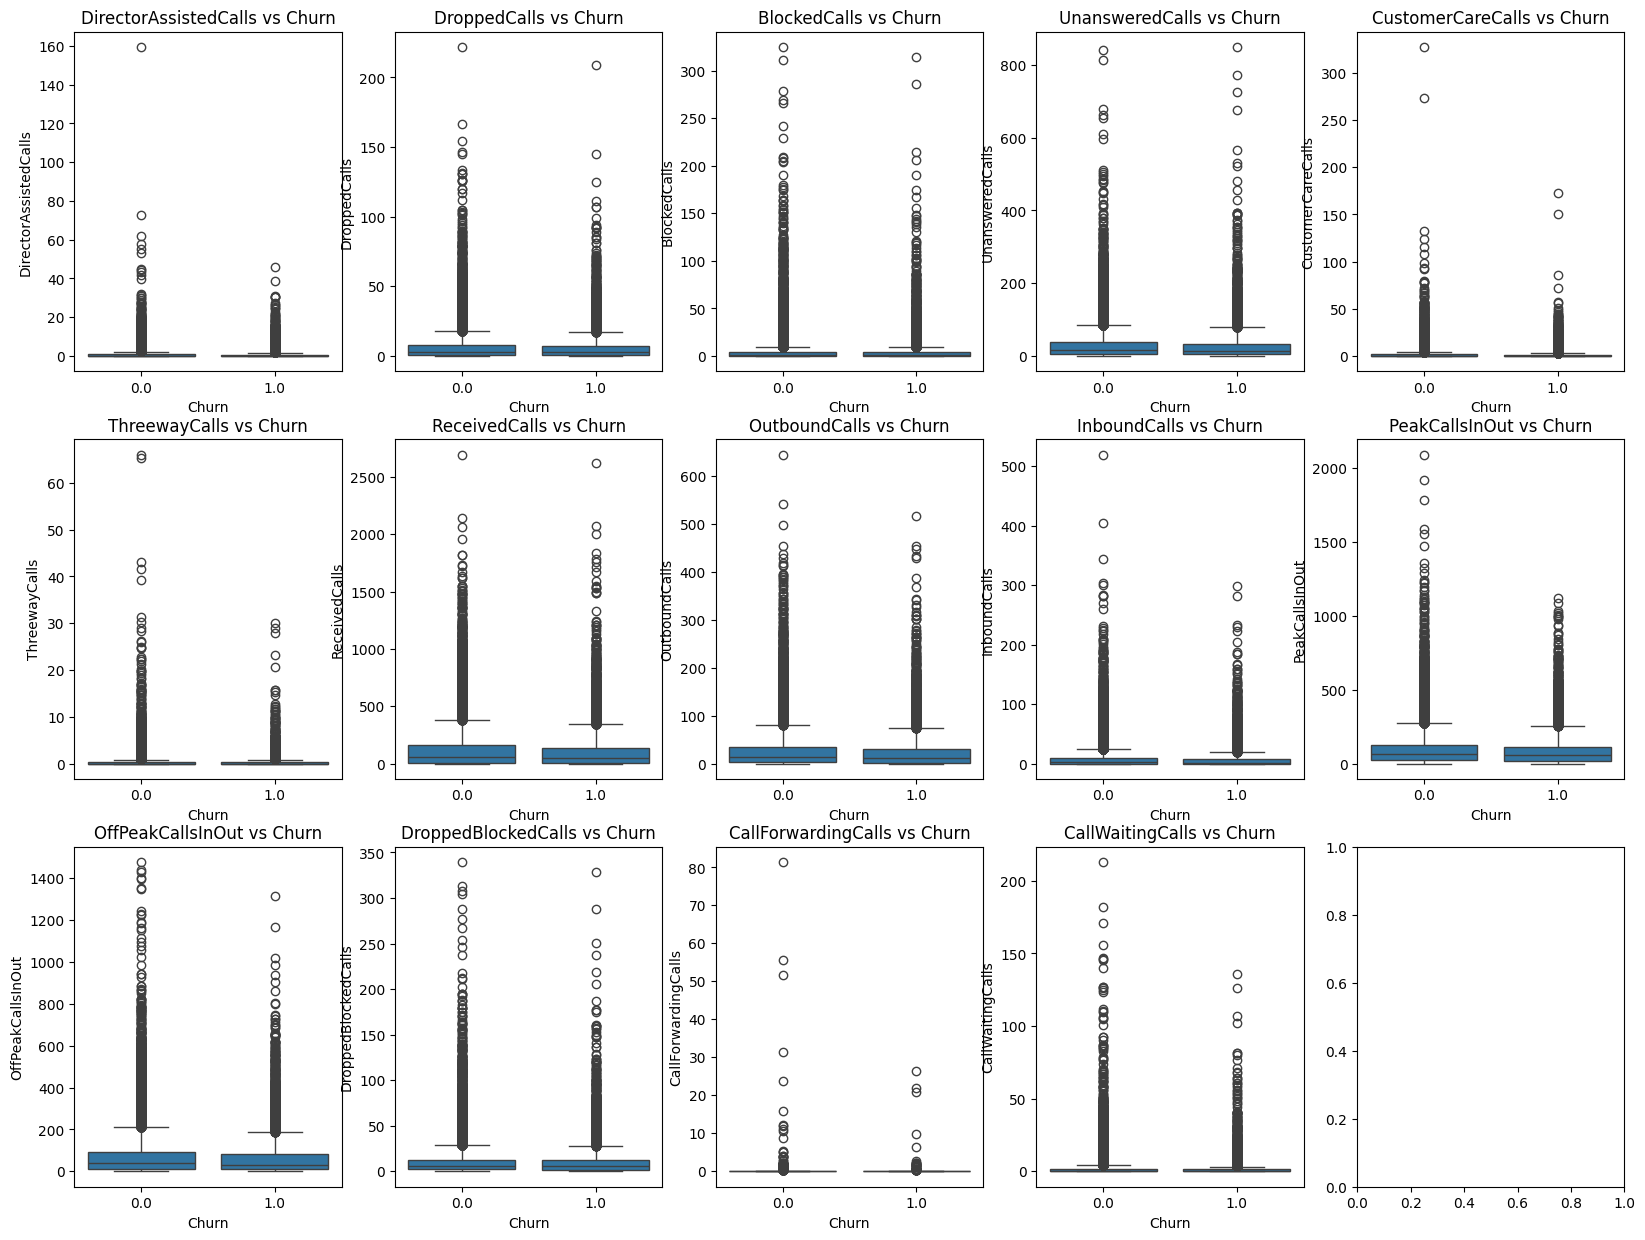

In [274]:
columns = [col for col in call_stats.columns if (col != 'CustomerID' and col != 'Churn')] #14
num_cols = 5 # 한 줄에 표시할 그래프 개수
num_rows = (len(columns) + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5)) 
axes = axes.flatten() 

# 박스플롯 그리기
for i, col in enumerate(columns):
    ax = axes[i] 
    sns.boxplot(data=call_stats, x='Churn', y=col, ax=ax)
    ax.set_title(f"{col} vs Churn")

### handset_details : 장치 정보 
- Handsets: 사용 중인 핸드셋(휴대전화)의 수.
- HandsetModels: 사용 중인 핸드셋 모델의 종류(모델 수).
- CurrentEquipmentDays: 현재 장비를 사용한 일수.
- HandsetRefurbished: 리퍼비시드(재생) 장비 사용 여부.
- HandsetWebCapable: 인터넷 접속 가능한 핸드셋 여부.

In [275]:
handset_details.dtypes 

CustomerID                int64
Handsets                float64
HandsetModels           float64
CurrentEquipmentDays    float64
HandsetRefurbished       object
HandsetWebCapable        object
Churn                   float64
dtype: object

In [276]:
handset_details.head(5)

,CustomerID,Handsets,HandsetModels,CurrentEquipmentDays,HandsetRefurbished,HandsetWebCapable,Churn
0,3000002,2.0,2.0,361.0,No,Yes,1.0
1,3000010,2.0,1.0,1504.0,No,No,1.0
2,3000014,1.0,1.0,1812.0,No,No,0.0
3,3000022,9.0,4.0,458.0,No,Yes,0.0
4,3000026,4.0,3.0,852.0,No,No,1.0


In [277]:
# object -> 숫자
mapping = {'No': 0.0, 'Yes': 1.0}
handset_details['HandsetRefurbished'] = handset_details['HandsetRefurbished'].map(mapping)
handset_details['HandsetWebCapable'] = handset_details['HandsetWebCapable'].map(mapping)
handset_details

,CustomerID,Handsets,HandsetModels,CurrentEquipmentDays,HandsetRefurbished,HandsetWebCapable,Churn
0,3000002,2.0,2.0,361.0,0.0,1.0,1.0
1,3000010,2.0,1.0,1504.0,0.0,0.0,1.0
2,3000014,1.0,1.0,1812.0,0.0,0.0,0.0
3,3000022,9.0,4.0,458.0,0.0,1.0,0.0
4,3000026,4.0,3.0,852.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
51035,3399894,1.0,1.0,883.0,0.0,1.0,0.0
51037,3399906,1.0,1.0,883.0,0.0,1.0,0.0
51040,3399942,1.0,1.0,882.0,0.0,0.0,0.0
51041,3399946,2.0,2.0,489.0,0.0,1.0,1.0


<Axes: >

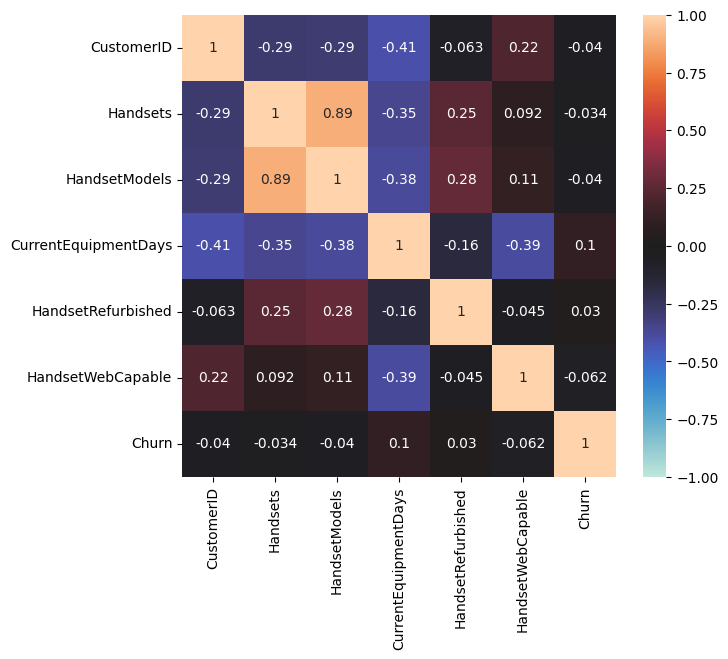

In [278]:
plt.figure(figsize=(7,6))
sns.heatmap(handset_details.corr(), vmax=1, vmin=-1, center=0, annot=True)

/tmp/ipykernel_24436/289796344.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=handset_details[handset_details['Churn'] == 0], x='CurrentEquipmentDays', label='Churn=0', shade=True)
/tmp/ipykernel_24436/289796344.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=handset_details[handset_details['Churn'] == 1], x='CurrentEquipmentDays', label='Churn=1', shade=True)


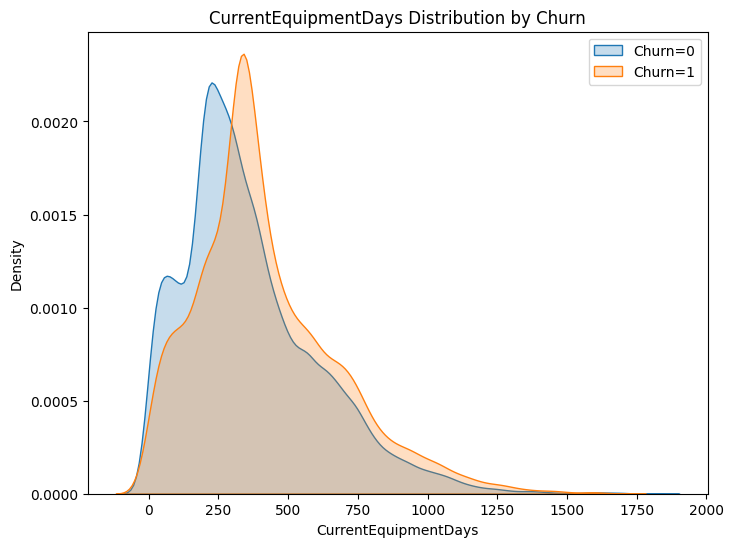

In [279]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=handset_details[handset_details['Churn'] == 0], x='CurrentEquipmentDays', label='Churn=0', shade=True)
sns.kdeplot(data=handset_details[handset_details['Churn'] == 1], x='CurrentEquipmentDays', label='Churn=1', shade=True)
plt.title("CurrentEquipmentDays Distribution by Churn")
plt.legend()
plt.show()

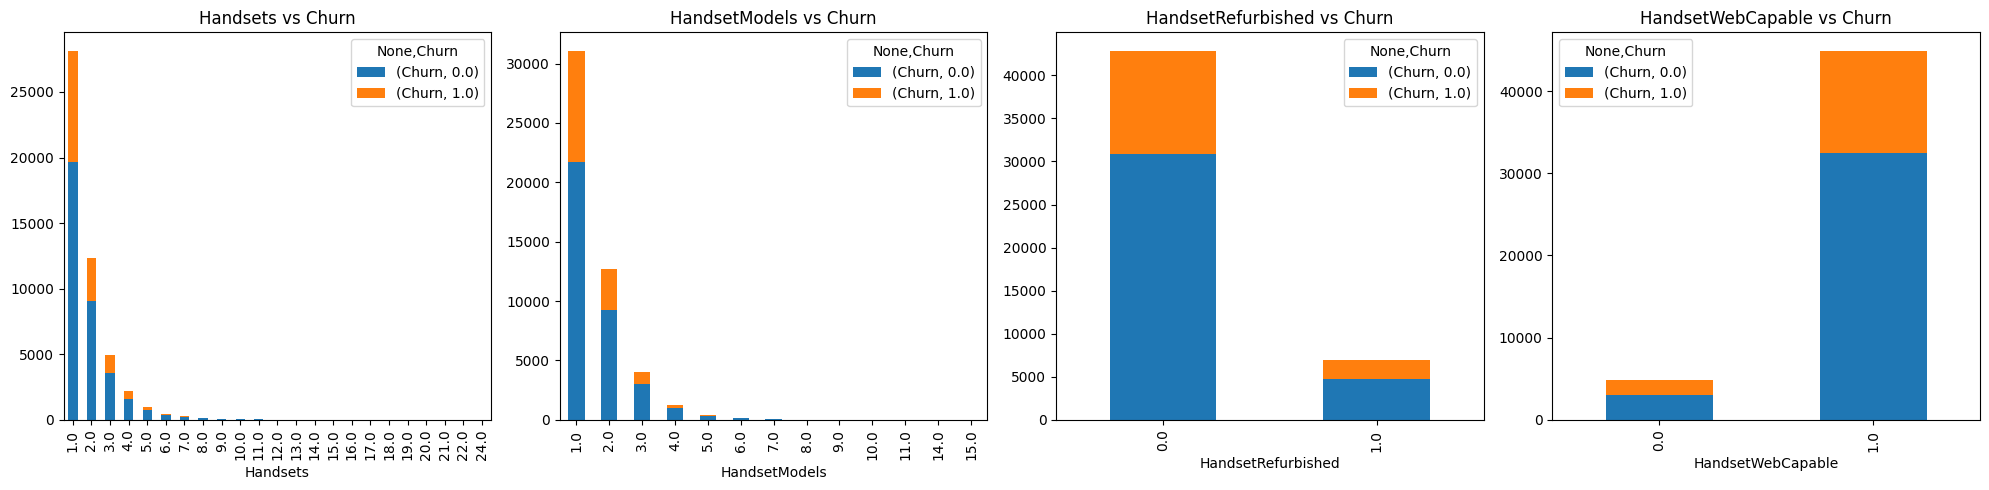

In [280]:
columns = [col for col in handset_details.columns if (col != 'CustomerID' and col != 'Churn' and col != 'CurrentEquipmentDays')] #14
num_cols = 4  # 한 줄에 표시할 그래프 개수
num_rows = (len(columns) + num_cols - 1) // num_cols  # 필요한 행 개수 계산
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # 서브플롯 생성
axes = axes.flatten() # Flatten 서브플롯 축 배열

for i, x in enumerate(columns):
    ax = axes[i]  # 현재 서브플롯 축
    handset_details[[x, 'Churn']].groupby([x, 'Churn'])[['Churn']].count().unstack().plot.bar(stacked=True, ax=ax)  # 각 축에 그래프 그리기
    ax.set_title(f"{x} vs Churn")  # 그래프 제목 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()

### customer_profile : 고객 프로필 정보 
- AgeHH1: 가구 내 첫 번째 성인의 연령?
- AgeHH2: 가구 내 두 번째 성인의 연령 (있을 경우).
- ChildrenInHH: 가구 내 아이의 수.
- IncomeGroup: 고객의 소득 그룹.
- PrizmCode: 고객의 지리적/사회적 분류 코드 (미국 지역별 생활 패턴을 나타냄).
- Occupation: 고객의 직업.
- MaritalStatus: 결혼 상태 (기혼, 미혼 등).

In [281]:
customer_profile.dtypes

CustomerID         int64
AgeHH1           float64
AgeHH2           float64
ChildrenInHH      object
IncomeGroup        int64
PrizmCode         object
Occupation        object
MaritalStatus     object
Churn            float64
dtype: object

In [282]:
customer_profile[customer_profile.AgeHH1 == 0]

,CustomerID,AgeHH1,AgeHH2,ChildrenInHH,IncomeGroup,PrizmCode,Occupation,MaritalStatus,Churn
10,3000054,0.0,0.0,No,7,Other,Other,Unknown,0.0
17,3000118,0.0,0.0,No,0,Other,Other,Unknown,0.0
34,3000222,0.0,0.0,No,0,Town,Other,Unknown,1.0
44,3000294,0.0,0.0,No,0,Suburban,Other,Unknown,0.0
48,3000318,0.0,0.0,No,0,Other,Other,Unknown,1.0
...,...,...,...,...,...,...,...,...,...
50988,3399522,0.0,0.0,No,0,Other,Other,Unknown,0.0
51020,3399778,0.0,0.0,No,8,Rural,Other,Yes,0.0
51029,3399846,0.0,0.0,No,5,Other,Other,No,1.0
51031,3399874,0.0,0.0,No,0,Other,Other,Unknown,1.0


In [283]:
customer_profile.head(5)

,CustomerID,AgeHH1,AgeHH2,ChildrenInHH,IncomeGroup,PrizmCode,Occupation,MaritalStatus,Churn
0,3000002,62.0,0.0,No,4,Suburban,Professional,No,1.0
1,3000010,40.0,42.0,Yes,5,Suburban,Professional,Yes,1.0
2,3000014,26.0,26.0,Yes,6,Town,Crafts,Yes,0.0
3,3000022,30.0,0.0,No,6,Other,Other,No,0.0
4,3000026,46.0,54.0,No,9,Other,Professional,Yes,1.0


In [284]:
customer_profile['PrizmCode'].unique()  # ['Suburban', 'Town', 'Other', 'Rural']
customer_profile['Occupation'].unique()  # ['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker', 'Clerical', 'Student']
customer_profile['MaritalStatus'].unique()  # ['No', 'Yes', 'Unknown']

array(['No', 'Yes', 'Unknown'], dtype=object)

In [285]:
# object -> 숫자
mappings = {
    'ChildrenInHH' : {'No': 0, 'Yes': 1},
    'PrizmCode': {'Suburban' : 0, 'Town' : 1, 'Other' : 2, 'Rural' : 3},
    'Occupation': {'Professional' : 0, 'Crafts' : 1, 'Other' : 2, 'Self' : 3, 'Retired' : 4, 'Homemaker' : 5, 'Clerical' : 6, 'Student' : 7},
    'MaritalStatus': {'No': 0, 'Yes': 1, 'Unknown': 2}
}
for col, mapping in mappings.items():
    customer_profile[col] = customer_profile[col].replace(mapping)

/tmp/ipykernel_24436/2102724842.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_profile[col] = customer_profile[col].replace(mapping)


In [286]:
customer_profile.head(5)

,CustomerID,AgeHH1,AgeHH2,ChildrenInHH,IncomeGroup,PrizmCode,Occupation,MaritalStatus,Churn
0,3000002,62.0,0.0,0,4,0,0,0,1.0
1,3000010,40.0,42.0,1,5,0,0,1,1.0
2,3000014,26.0,26.0,1,6,1,1,1,0.0
3,3000022,30.0,0.0,0,6,2,2,0,0.0
4,3000026,46.0,54.0,0,9,2,0,1,1.0


<Axes: >

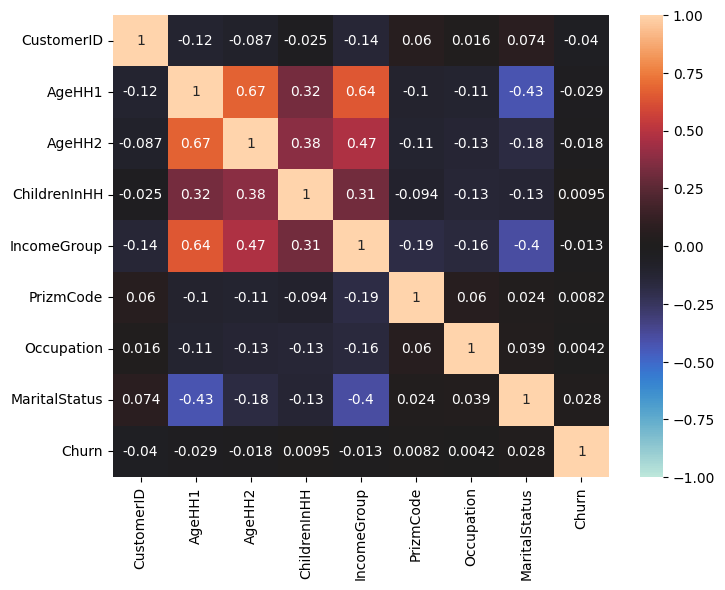

In [287]:
plt.figure(figsize=(8,6))
sns.heatmap(customer_profile.corr(), vmax=1, vmin=-1, center=0, annot=True)

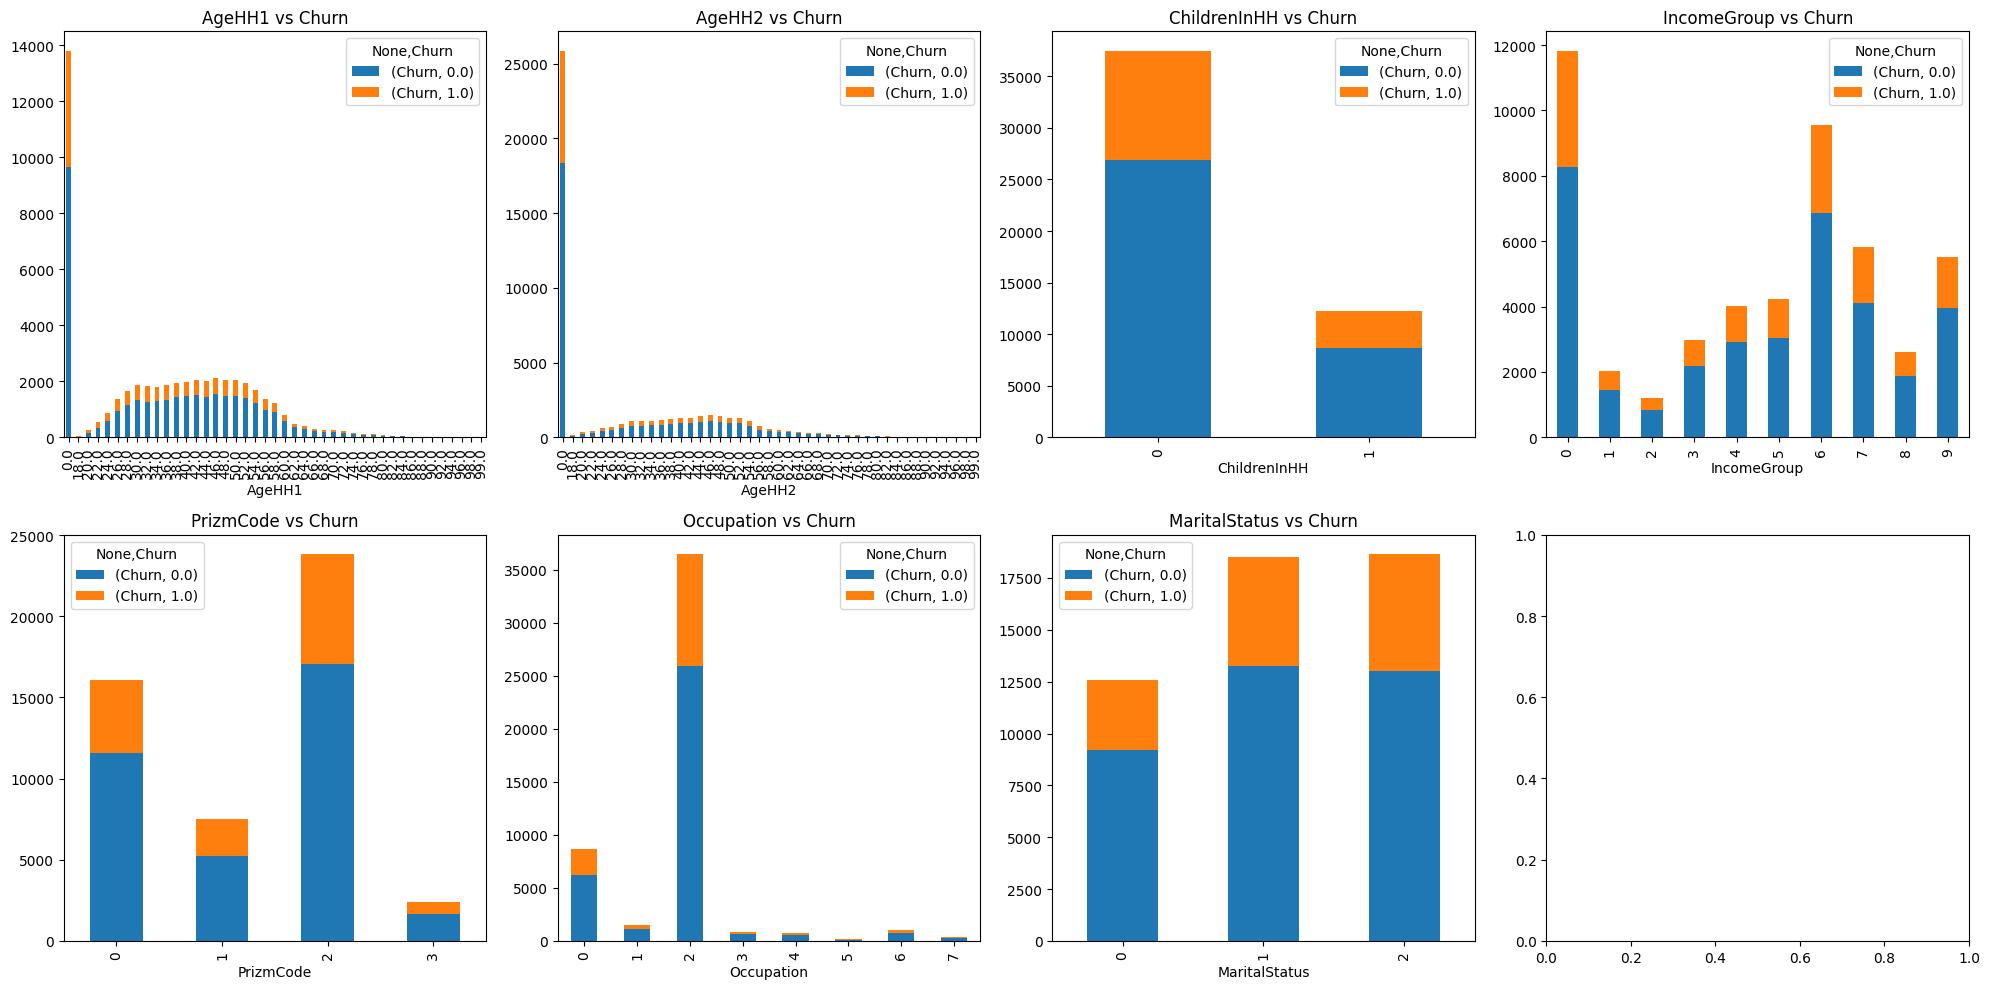

In [288]:
columns = [col for col in customer_profile.columns if (col != 'CustomerID' and col != 'Churn')] #14
num_cols = 4  # 한 줄에 표시할 그래프 개수
num_rows = (len(columns) + num_cols - 1) // num_cols  # 필요한 행 개수 계산
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # 서브플롯 생성
axes = axes.flatten() # Flatten 서브플롯 축 배열

for i, x in enumerate(columns):
    ax = axes[i]  # 현재 서브플롯 축
    customer_profile[[x, 'Churn']].groupby([x, 'Churn'])[['Churn']].count().unstack().plot.bar(stacked=True, ax=ax)  # 각 축에 그래프 그리기
    ax.set_title(f"{x} vs Churn")  # 그래프 제목 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()

### customer_lifestyle : 고객 라이프스타일 정보 
- TruckOwner: 트럭 소유 여부.
- RVOwner: RV(레저용 차량) 소유 여부.
- Homeownership: 주택 소유 여부.
- BuysViaMailOrder: 우편 주문 구매 여부.
- RespondsToMailOffers: 우편 광고에 응답한 여부.
- OptOutMailings: 우편 광고 수신 거부 여부.
- NonUSTravel: 비미국 여행 경험 여부.
- OwnsComputer: 컴퓨터 소유 여부.
- HasCreditCard: 신용카드 소유 여부.
- OwnsMotorcycle: 오토바이 소유 여부.

In [289]:
customer_lifestyle.dtypes
print("\n".join([f"{col}: {customer_lifestyle[col].unique()}" for col in customer_lifestyle.select_dtypes(include=['object']).columns]))


TruckOwner: ['No' 'Yes']
RVOwner: ['No' 'Yes']
Homeownership: ['Known' 'Unknown']
BuysViaMailOrder: ['Yes' 'No']
RespondsToMailOffers: ['Yes' 'No']
OptOutMailings: ['No' 'Yes']
NonUSTravel: ['No' 'Yes']
OwnsComputer: ['Yes' 'No']
HasCreditCard: ['Yes' 'No']
OwnsMotorcycle: ['No' 'Yes']


In [290]:
mappings = {
	'TruckOwner' : {'No': 0, 'Yes': 1},
	'RVOwner' : {'No': 0, 'Yes': 1},
	'Homeownership' : {'Known' : 0, 'Unknown' : 1},
	'BuysViaMailOrder' : {'No': 0, 'Yes': 1},
	'RespondsToMailOffers' : {'No': 0, 'Yes': 1},
	'OptOutMailings' : {'No': 0, 'Yes': 1},
	'NonUSTravel' : {'No': 0, 'Yes': 1},
	'OwnsComputer' : {'No': 0, 'Yes': 1},
	'HasCreditCard' : {'No': 0, 'Yes': 1},
	'OwnsMotorcycle' : {'No': 0, 'Yes': 1}
}
for col, mapping in mappings.items():
    customer_lifestyle[col] = customer_lifestyle[col].map(mapping)


<Axes: >

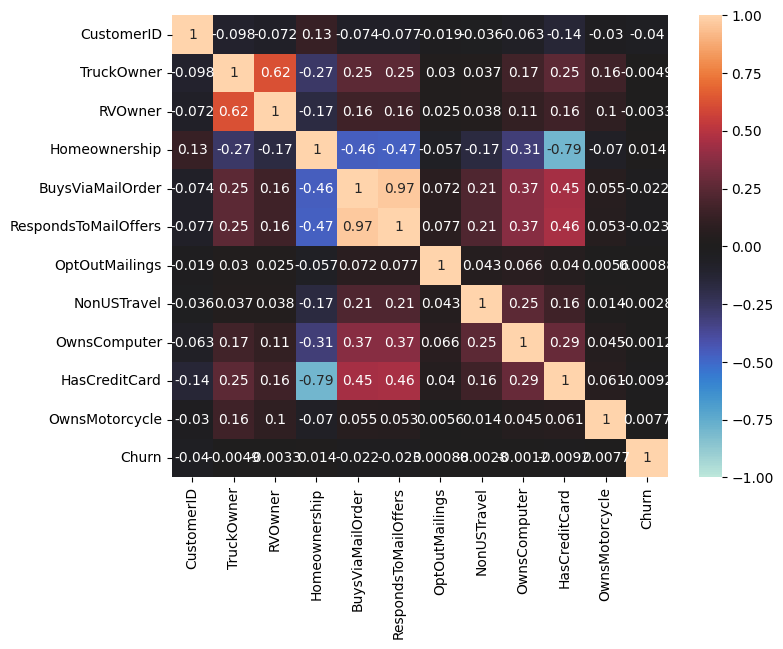

In [291]:
plt.figure(figsize=(8,6))
sns.heatmap(customer_lifestyle.corr(), vmax=1, vmin=-1, center=0, annot=True)

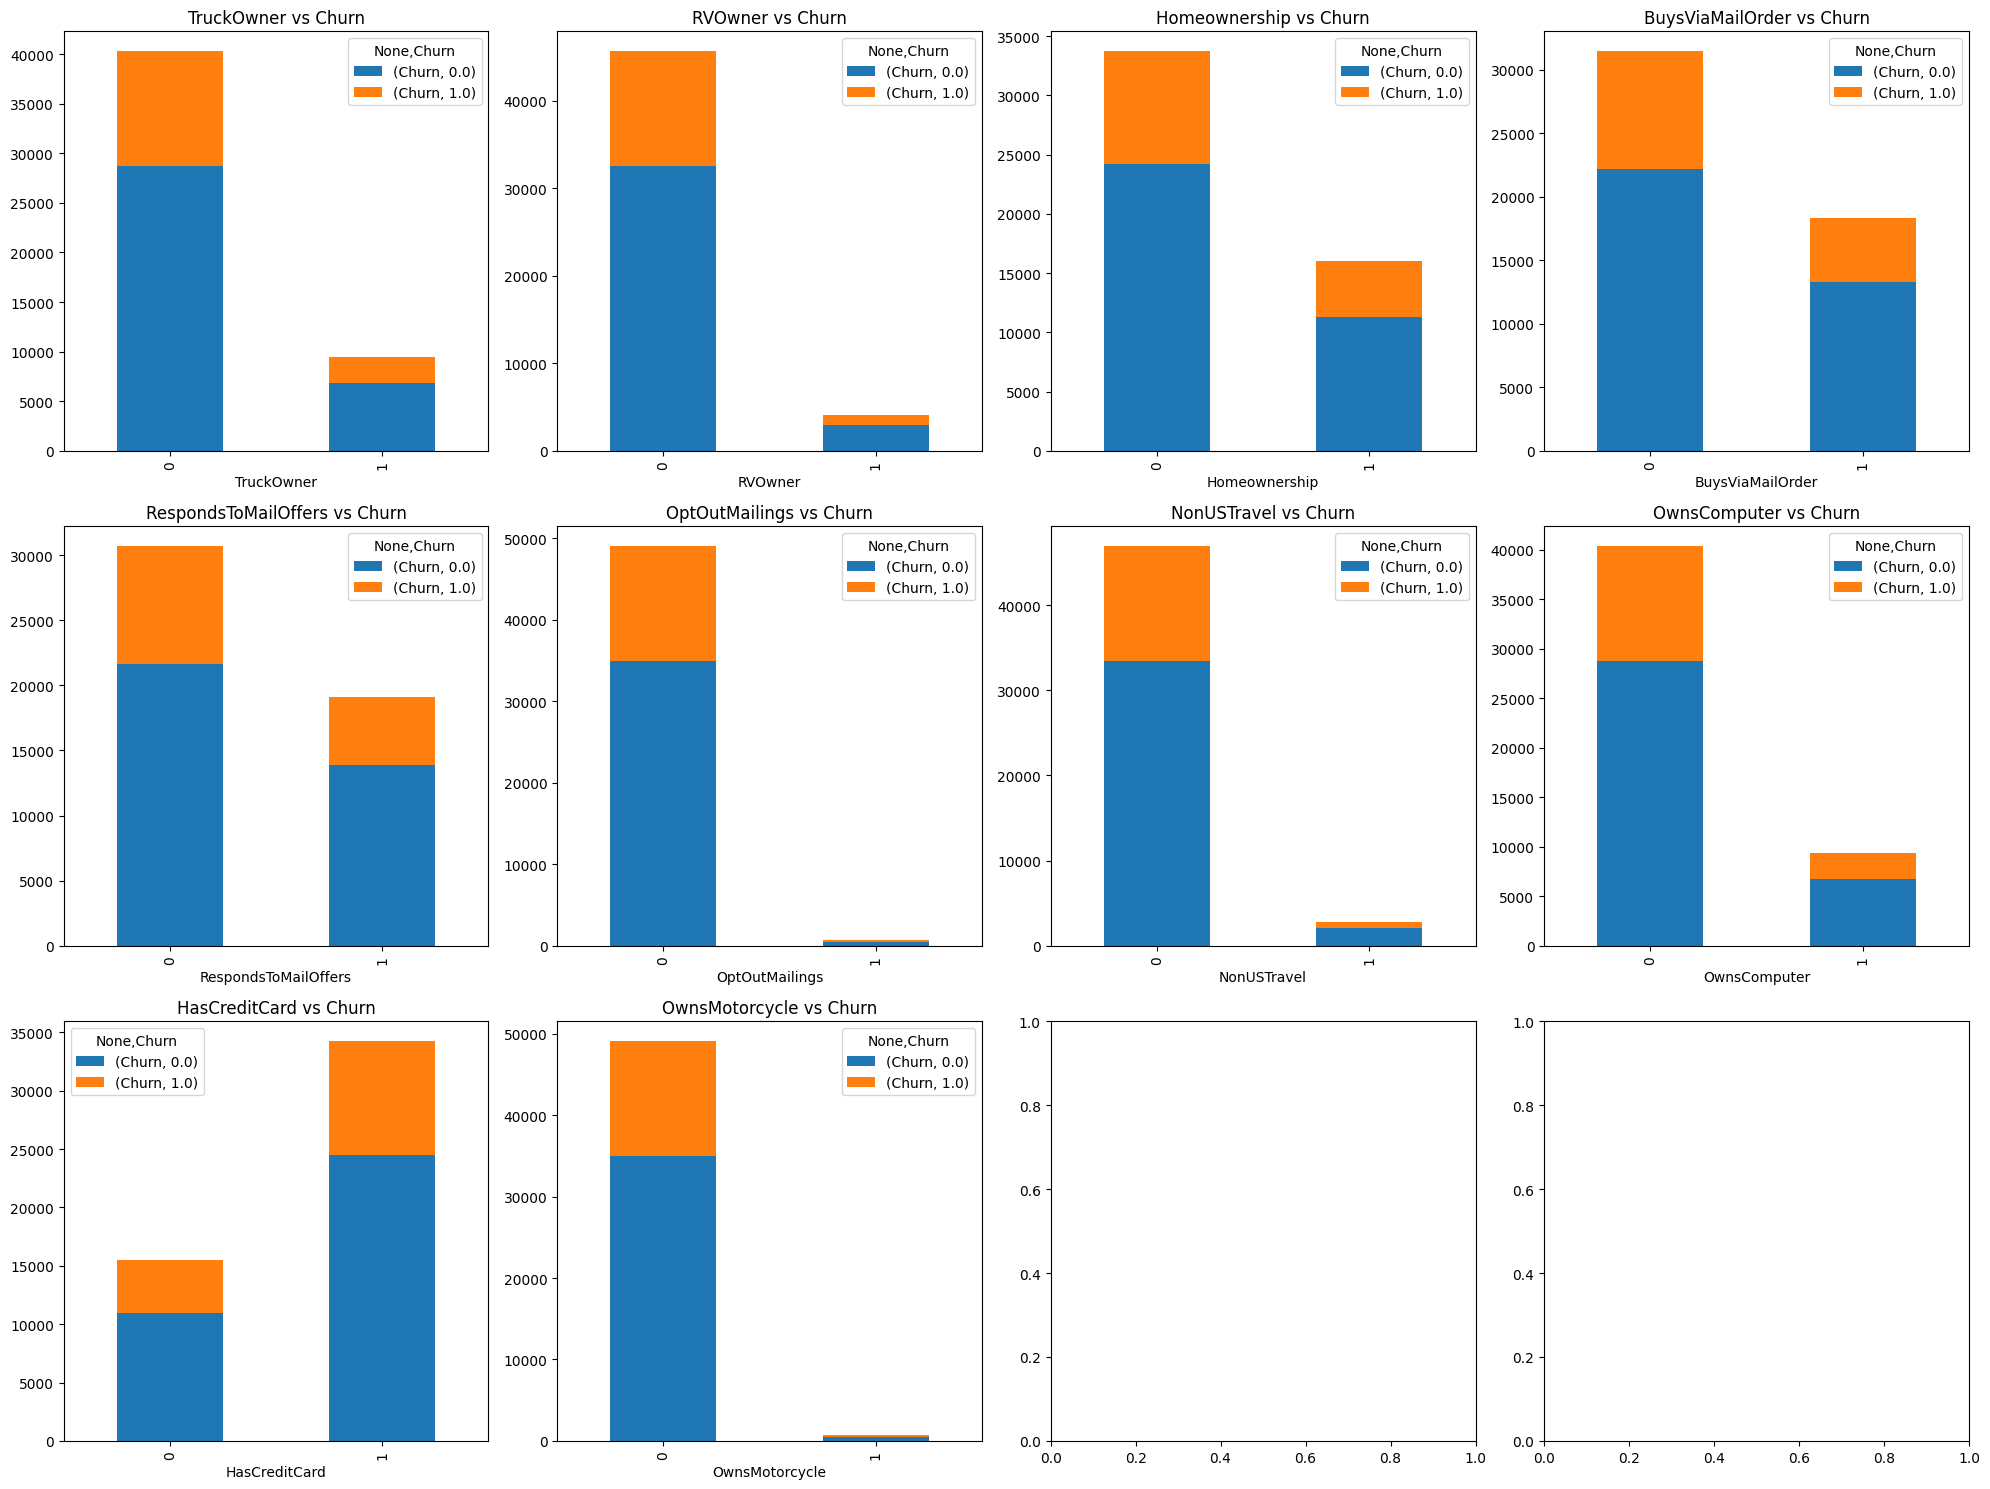

In [292]:
columns = [col for col in customer_lifestyle.columns if (col != 'CustomerID' and col != 'Churn')] #14
num_cols = 4  # 한 줄에 표시할 그래프 개수
num_rows = (len(columns) + num_cols - 1) // num_cols  # 필요한 행 개수 계산
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # 서브플롯 생성
axes = axes.flatten() # Flatten 서브플롯 축 배열

for i, x in enumerate(columns):
    ax = axes[i]  # 현재 서브플롯 축
    customer_lifestyle[[x, 'Churn']].groupby([x, 'Churn'])[['Churn']].count().unstack().plot.bar(stacked=True, ax=ax)  # 각 축에 그래프 그리기
    ax.set_title(f"{x} vs Churn")  # 그래프 제목 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()

### customer_churn : 이탈 및 관리정보 
- MonthsInService: 고객이 서비스를 이용한 총 개월 수.
- RetentionCalls: 고객 유지 관련 통화 횟수 (이탈 방지 통화).
- RetentionOffersAccepted: 고객이 이탈 방지 오퍼를 수락한 횟수.
- NewCellphoneUser: 신규 휴대전화 사용자 여부.
- NotNewCellphoneUser: 기존 휴대전화 사용자 여부.
- ReferralsMadeBySubscriber: 구독자가 추천한 사용자 수.
- AdjustmentsToCreditRating: 신용 등급 조정 횟수.
- HandsetPrice: 핸드셋의 가격.
- MadeCallToRetentionTeam: 고객 유지 팀에 통화 여부.
- CreditRating: 신용 등급 (높음, 중간, 낮음 등).

In [293]:
customer_churn.dtypes
print("\n".join([f"{col}: {customer_churn[col].unique()}" for col in customer_churn.select_dtypes(include=['object']).columns]))

NewCellphoneUser: ['No' 'Yes']
NotNewCellphoneUser: ['No' 'Yes']
HandsetPrice: ['30' 'Unknown' '10' '80' '150' '300' '40' '200' '100' '130' '60' '400'
 '240' '250' '180' '500']
MadeCallToRetentionTeam: ['Yes' 'No']
CreditRating: ['1-Highest' '4-Medium' '3-Good' '2-High' '5-Low' '6-VeryLow' '7-Lowest']


In [294]:
mappings = {
    'NewCellphoneUser' : {'No' : 0, 'Yes' :1},
    'NotNewCellphoneUser' : {'No' : 0, 'Yes' : 1},
    'MadeCallToRetentionTeam' : {'No' : 0, 'Yes' : 1},
    'CreditRating' : {'1-Highest' : 1, '4-Medium': 4,  '3-Good': 3, '2-High' : 2, '5-Low' : 5, '6-VeryLow' : 6, '7-Lowest' : 7}
}
for col, mapping in mappings.items():
    customer_churn[col] = customer_churn[col].map(mapping)


In [295]:
def label_handset_price(val):
    if val == 'Unknown':
        return -1  # Unknown 값을 -1로 라벨링
    else:
        return int(val)  # 나머지는 숫자로 변환
customer_churn['HandsetPrice'] = customer_churn['HandsetPrice'].apply(label_handset_price)

<Axes: >

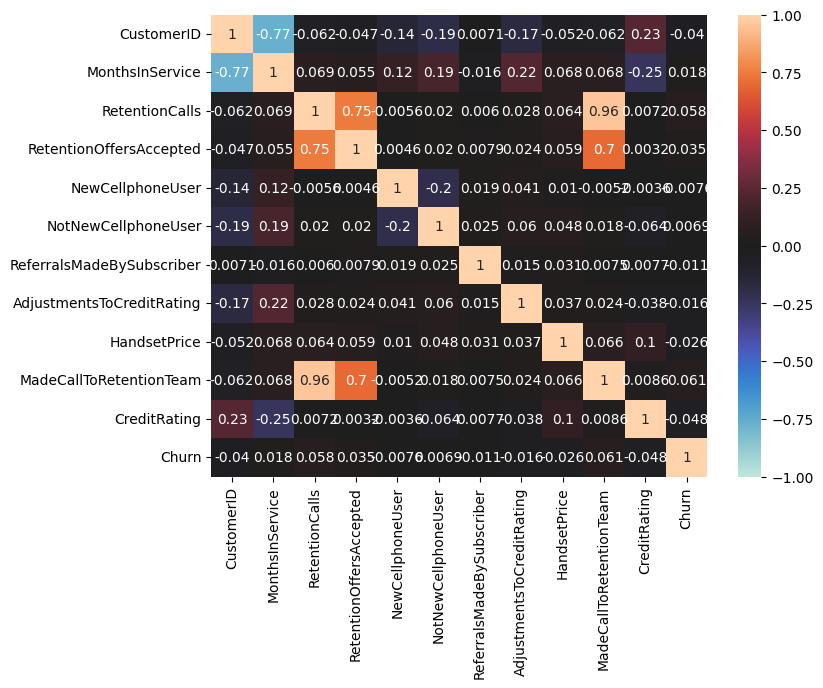

In [296]:
plt.figure(figsize=(8,6))
sns.heatmap(customer_churn.corr(), vmax=1, vmin=-1, center=0, annot=True)

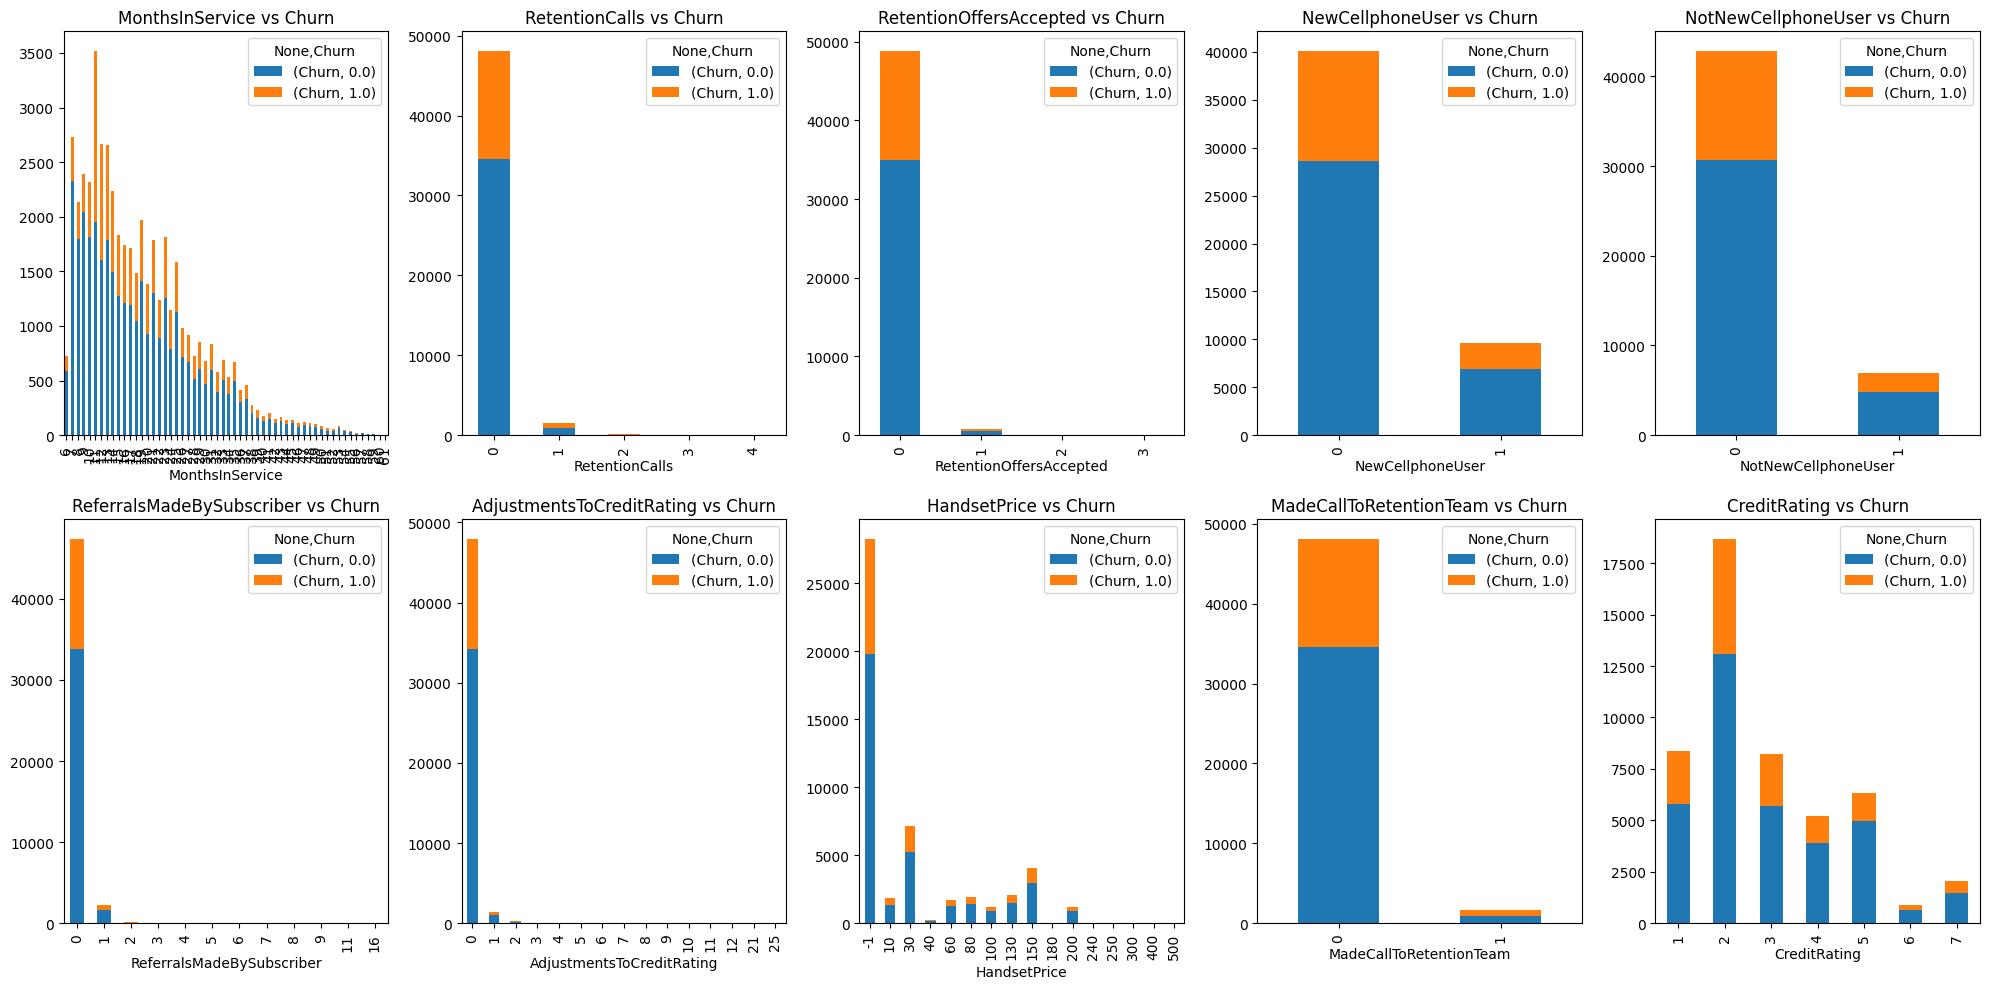

In [297]:

drow_col = ['MonthsInService', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating',
       'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating']
num_cols = 5  # 한 줄에 표시할 그래프 개수
num_rows = (len(drow_col) + num_cols - 1) // num_cols  # 필요한 행 개수 계산
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # 서브플롯 생성
axes = axes.flatten() # Flatten 서브플롯 축 배열

for i, x in enumerate(drow_col):
    ax = axes[i]  # 현재 서브플롯 축
    customer_churn[[x, 'Churn']].groupby([x, 'Churn'])[['Churn']].count().unstack().plot.bar(stacked=True, ax=ax)  # 각 축에 그래프 그리기
    ax.set_title(f"{x} vs Churn")  # 그래프 제목 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [298]:
# billing_usage.corr()['Churn']
# call_stats.corr()['Churn']
# handset_details.corr()['Churn']
# customer_profile.corr()['Churn']
# customer_lifestyle.corr()['Churn']
customer_churn.corr()['Churn']

CustomerID                  -0.040186
MonthsInService              0.017544
RetentionCalls               0.058422
RetentionOffersAccepted      0.034511
NewCellphoneUser            -0.007639
NotNewCellphoneUser          0.006900
ReferralsMadeBySubscriber   -0.011390
AdjustmentsToCreditRating   -0.016123
HandsetPrice                -0.026449
MadeCallToRetentionTeam      0.060577
CreditRating                -0.047741
Churn                        1.000000
Name: Churn, dtype: float64

In [299]:
import pandas as pd

# 데이터프레임 리스트
dfs = [billing_usage, call_stats, handset_details, customer_profile, customer_lifestyle, customer_churn]

# 병합 전에 중복된 'Churn' 컬럼 제거 (첫 번째 테이블 제외)
for i, df in enumerate(dfs):
    if 'Churn' in df.columns and i > 0:  # 첫 번째 테이블 제외
        dfs[i] = df.drop(columns=['Churn'])

# 데이터프레임 병합
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='CustomerID', how='inner', suffixes=('', '_dup'))

# 중복 컬럼 제거
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# 결과 확인
merged_df.head()


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Churn,DirectorAssistedCalls,...,MonthsInService,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating
0,3000002,24.00,219.0,22.0,0.0,0.0,-157.0,-19.0,1.0,0.25,...,61,1,0,0,0,0,0,30,1,1
1,3000010,16.99,10.0,17.0,0.0,0.0,-4.0,0.0,1.0,0.00,...,58,0,0,1,0,0,0,30,0,4
2,3000014,38.00,8.0,38.0,0.0,0.0,-2.0,0.0,0.0,0.00,...,60,0,0,1,0,0,0,-1,0,3
3,3000022,82.28,1312.0,75.0,0.0,0.0,157.0,8.1,0.0,1.24,...,59,0,0,1,0,0,0,10,0,4
4,3000026,17.14,0.0,17.0,0.0,0.0,0.0,-0.2,1.0,0.00,...,53,0,0,0,1,0,1,10,0,1


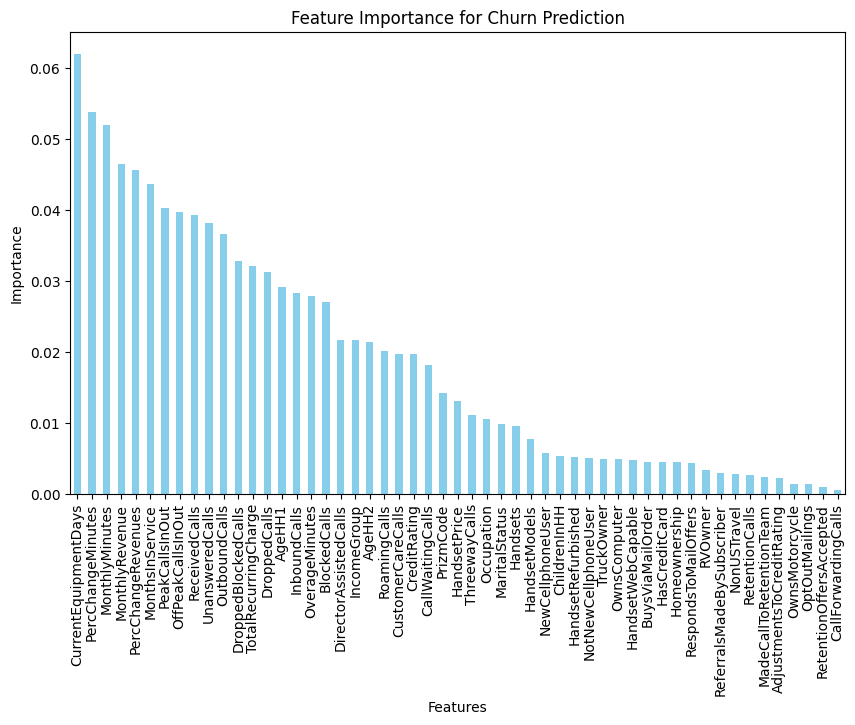

In [300]:
columns = [col for col in merged_df.columns if (col != 'CustomerID' and col != 'Churn')]

# 모델 학습
X = merged_df[columns]
y = merged_df['Churn']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 변수 중요도 시각화
importances = pd.Series(model.feature_importances_, index=columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance for Churn Prediction")
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [301]:
importances[10:40]

OutboundCalls            0.036592
DroppedBlockedCalls      0.032850
TotalRecurringCharge     0.032066
DroppedCalls             0.031257
AgeHH1                   0.029115
InboundCalls             0.028317
OverageMinutes           0.027893
BlockedCalls             0.027018
DirectorAssistedCalls    0.021763
IncomeGroup              0.021649
AgeHH2                   0.021394
RoamingCalls             0.020173
CustomerCareCalls        0.019711
CreditRating             0.019664
CallWaitingCalls         0.018239
PrizmCode                0.014299
HandsetPrice             0.013043
ThreewayCalls            0.011157
Occupation               0.010618
MaritalStatus            0.009873
Handsets                 0.009528
HandsetModels            0.007792
NewCellphoneUser         0.005765
ChildrenInHH             0.005350
HandsetRefurbished       0.005284
NotNewCellphoneUser      0.005128
TruckOwner               0.004994
OwnsComputer             0.004937
HandsetWebCapable        0.004762
BuysViaMailOrd

In [302]:
# 사용할 컬럼 
# CustomerID
# MonthlyRevenue: 월별 매출 (고객이 매달 지불하는 금액).
# MonthlyMinutes: 월별 사용 시간 (통화 시간, 분 단위).
# TotalRecurringCharge: 월 기본 요금 (정기적으로 청구되는 요금).
# OverageMinutes: 초과 통화 시간 (기본 제공 시간을 초과한 통화 분).
# RoamingCalls: 로밍 중에 발생한 통화 횟수.
# PercChangeMinutes: 월간 통화 시간 변화율 (이전 달과 비교한 변화율).
# PercChangeRevenues: 월간 매출 변화율 (이전 달과 비교한 변화율).
# MonthsInService: 고객이 서비스를 이용한 총 개월 수.
# RetentionCalls: 고객 유지 관련 통화 횟수 (이탈 방지 통화).
# RetentionOffersAccepted: 고객이 이탈 방지 오퍼를 수락한 횟수.
# NewCellphoneUser: 신규 휴대전화 사용자 여부.
# NotNewCellphoneUser: 기존 휴대전화 사용자 여부.
# ReferralsMadeBySubscriber: 구독자가 추천한 사용자 수.
# AdjustmentsToCreditRating: 신용 등급 조정 횟수.
# MadeCallToRetentionTeam: 고객 유지 팀에 통화 여부.
# CreditRating: 신용 등급 (높음, 중간, 낮음 등).
# PeakCallsInOut: 피크 시간대(혼잡 시간)의 통화 횟수 (발신/수신).
# OffPeakCallsInOut: 비혼잡 시간대의 통화 횟수 (발신/수신).
# ReceivedCalls: 받은 전화의 총 횟수.
# UnansweredCalls: 받지 않은 통화 횟수.
# OutboundCalls: 발신 전화의 총 횟수.
# DroppedBlockedCalls: 끊기거나 차단된 통화의 총 횟수.
# DroppedCalls: 통화 중 끊긴 횟수.
# InboundCalls: 수신 전화의 총 횟수.
# BlockedCalls: 연결 실패(차단된) 통화 횟수.
# DirectorAssistedCalls: 상담원(직접) 연결된 통화 횟수.
# CustomerCareCalls: 고객센터에 연결된 통화 횟수.
# CallWaitingCalls: 통화 대기 기능을 사용한 횟수.
# CurrentEquipmentDays: 현재 장비를 사용한 일수.
# HandsetRefurbished: 리퍼비시드(재생) 장비 사용 여부.
# IncomeGroup: 고객의 소득 그룹.
# PrizmCode: 고객의 지리적/사회적 분류 코드 (미국 지역별 생활 패턴을 나타냄).
# Occupation: 고객의 직업.
# MaritalStatus: 결혼 상태 (기혼, 미혼 등).
# HandsetModels: 사용 중인 핸드셋 모델의 종류(모델 수).
# AgeHH1: 가구 내 첫 번째 성인의 연령.
# ChildrenInHH: 가구 내 아이의 수.
# HandsetPrice
# ThreewayCalls
# Handsets

In [303]:
X_data = df_all[['CustomerID','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues','MonthsInService','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser','NotNewCellphoneUser','ReferralsMadeBySubscriber','AdjustmentsToCreditRating','MadeCallToRetentionTeam','CreditRating','PeakCallsInOut','OffPeakCallsInOut','ReceivedCalls','UnansweredCalls','OutboundCalls','DroppedBlockedCalls','DroppedCalls','InboundCalls','BlockedCalls','DirectorAssistedCalls','CustomerCareCalls','CallWaitingCalls','CurrentEquipmentDays','HandsetRefurbished','IncomeGroup','PrizmCode','Occupation','MaritalStatus','HandsetModels','AgeHH1','ChildrenInHH','HandsetPrice','ThreewayCalls','Handsets']].copy()
y_data = df_all['Churn']

In [304]:
np.unique(y_data, return_counts=True)

(array([0., 1.]), array([35507, 14245]))

In [305]:
X_data[X_data.select_dtypes(include=['object']).columns].head(30)

,NewCellphoneUser,NotNewCellphoneUser,MadeCallToRetentionTeam,CreditRating,HandsetRefurbished,PrizmCode,Occupation,MaritalStatus,ChildrenInHH,HandsetPrice
0,No,No,Yes,1-Highest,No,Suburban,Professional,No,No,30
1,Yes,No,No,4-Medium,No,Suburban,Professional,Yes,Yes,30
2,Yes,No,No,3-Good,No,Town,Crafts,Yes,Yes,Unknown
3,Yes,No,No,4-Medium,No,Other,Other,No,No,10
4,No,Yes,No,1-Highest,No,Other,Professional,Yes,No,10
5,Yes,No,No,3-Good,No,Other,Other,Yes,No,30
6,No,Yes,No,1-Highest,No,Other,Self,Yes,No,30
7,Yes,No,No,1-Highest,No,Other,Professional,No,Yes,30
8,Yes,No,No,1-Highest,No,Other,Other,Yes,Yes,80
9,Yes,No,No,3-Good,No,Other,Professional,No,No,30


In [306]:
y_n_col = ['NewCellphoneUser', 'NotNewCellphoneUser','MadeCallToRetentionTeam','HandsetRefurbished','ChildrenInHH']
y_n_mapping = {'Yes': 1, 'No': 0}
for x in y_n_col:
    X_data[x] = X_data[x].map(y_n_mapping)

In [307]:
def label_handset_price(value):
    if value == 'Unknown':
        return -1  # Unknown 값을 -1로 라벨링
        # return np.nan  # Unknown 값을 NaN으로 처리 (XGBoost사용)
    else:
        return int(value)  # 나머지는 숫자로 변환
X_data['HandsetPrice'] = X_data['HandsetPrice'].apply(label_handset_price)


In [308]:
X_data[X_data.select_dtypes(include=['object']).columns].head(20)

,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1-Highest,Suburban,Professional,No
1,4-Medium,Suburban,Professional,Yes
2,3-Good,Town,Crafts,Yes
3,4-Medium,Other,Other,No
4,1-Highest,Other,Professional,Yes
5,3-Good,Other,Other,Yes
6,1-Highest,Other,Self,Yes
7,1-Highest,Other,Professional,No
8,1-Highest,Other,Other,Yes
9,3-Good,Other,Professional,No


In [309]:
X_data.PrizmCode.unique(), X_data.Occupation.unique(), X_data.MaritalStatus.unique()

(array(['Suburban', 'Town', 'Other', 'Rural'], dtype=object),
 array(['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker',
        'Clerical', 'Student'], dtype=object),
 array(['No', 'Yes', 'Unknown'], dtype=object))

In [310]:
creditRating_mappings = {
    'CreditRating' : {'1-Highest' : 1, '2-High' : 2,  '3-Good': 3, '4-Medium': 4, '5-Low' : 5, '6-VeryLow' : 6, '7-Lowest' : 7}
}
for col, mapping in creditRating_mappings.items():
    X_data[col] = X_data[col].map(mapping)


In [311]:
# 원 핫 인코딩
X_data = pd.get_dummies(X_data, columns=['PrizmCode'],drop_first=False)
X_data = pd.get_dummies(X_data, columns=['Occupation'],drop_first=False)
X_data = pd.get_dummies(X_data, columns=['MaritalStatus'],drop_first=False)

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [313]:
y_data
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([28473, 11328]))

In [314]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


# 데이터 스케일링
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)  # 선형 모델 및 SVM, KNN용
X_test_scaler = sc.transform(X_test)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(n_jobs=-1),
    "SGDClassifier": SGDClassifier(n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1)
}

# 모델 훈련 및 평가
for name, model in models.items():
    # 트리 기반 모델에는 스케일링 전 데이터 사용
    if name in ["Decision Tree", "Random Forest", "HistGradientBoosting", "XGBoost"]:
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train_scaler, y_train)
        y_preds = model.predict(X_test_scaler)
        y_probs = model.predict_proba(X_test_scaler)[:, 1] if hasattr(model, "predict_proba") else None

    # 결과 출력
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds, pos_label=1.0)}")
    print(f"Precision: {precision_score(y_test, y_preds, pos_label=1.0)}")
    print(f"F1 Score: {f1_score(y_test, y_preds, pos_label=1.0)}")
    if y_probs is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_probs)}")
    print(confusion_matrix(y_test, y_preds))
    print("-" * 50)





Model: Logistic Regression
Accuracy: 0.7052557531906342
Recall: 0.02296880356530682
Precision: 0.44666666666666666
F1 Score: 0.043690903162699704
ROC-AUC: 0.6102533080666324
[[6951   83]
 [2850   67]]
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.6170234147321877
Recall: 0.34796023311621527
Precision: 0.34712722298221615
F1 Score: 0.3475432288991611
ROC-AUC: 0.5382820784574537
[[5125 1909]
 [1902 1015]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.7171138579037283
Recall: 0.08056222146040452
Precision: 0.6385869565217391
F1 Score: 0.1430745814307458
ROC-AUC: 0.6607016958328366
[[6901  133]
 [2682  235]]
--------------------------------------------------
Model: HistGradientBoosting
Accuracy: 0.7189227213345393
Recall: 0.09701748371614673
Precision: 0.6345291479820628
F1 Score: 0.16830211121022895
ROC-AUC: 0.6764555800227486
[[6871  163]
 [2634  283]]
--------------------------------------------------
Model: XGB

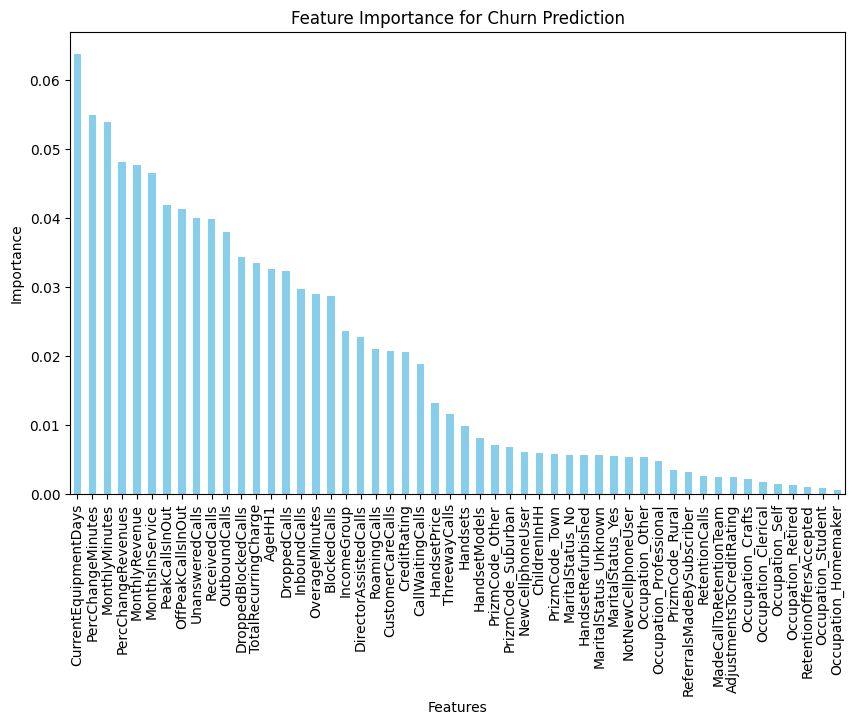

In [315]:
columns = [col for col in X_data.columns if (col != 'CustomerID')]

# 모델 학습
X = X_data[columns]
y = y_data
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 변수 중요도 시각화
importances = pd.Series(model.feature_importances_, index=columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance for Churn Prediction")
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [316]:
importances.head(30)

CurrentEquipmentDays     0.063775
PercChangeMinutes        0.054989
MonthlyMinutes           0.053976
PercChangeRevenues       0.048157
MonthlyRevenue           0.047753
MonthsInService          0.046520
PeakCallsInOut           0.041845
OffPeakCallsInOut        0.041266
UnansweredCalls          0.040009
ReceivedCalls            0.039867
OutboundCalls            0.038003
DroppedBlockedCalls      0.034361
TotalRecurringCharge     0.033532
AgeHH1                   0.032576
DroppedCalls             0.032316
InboundCalls             0.029789
OverageMinutes           0.028968
BlockedCalls             0.028721
IncomeGroup              0.023652
DirectorAssistedCalls    0.022719
RoamingCalls             0.021020
CustomerCareCalls        0.020734
CreditRating             0.020563
CallWaitingCalls         0.018811
HandsetPrice             0.013245
ThreewayCalls            0.011599
Handsets                 0.009832
HandsetModels            0.008081
PrizmCode_Other          0.007089
PrizmCode_Subu

In [317]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, 
    precision_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
import matplotlib.pyplot as plt
import numpy as np

# 데이터 스케일링 및 불균형 처리
sc = StandardScaler()

# # 불균형 데이터 처리
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
# 불균형 데이터 처리 및 노이즈 추가가
border_smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = border_smote.fit_resample(X_train, y_train)

# 스케일링 (트리 기반 모델에는 스케일링 생략)
X_train_scaler = sc.fit_transform(X_resampled)  # 선형 모델 및 SVM, KNN용
X_test_scaler = sc.transform(X_test)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(n_jobs=-1),
    "SGDClassifier": SGDClassifier(n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1)
}

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# NumPy 배열로 변환 (필요한 경우에만)
X_resampled = X_resampled.to_numpy() if isinstance(X_resampled, pd.DataFrame) else X_resampled
y_resampled = y_resampled.to_numpy() if isinstance(y_resampled, pd.Series) else y_resampled

# 모델 훈련 및 평가
results = {}
for name, model in models.items():
    print(f"Model: {name}")
    fold_accuracies = []
    fold_roc_aucs = []

    for train_idx, val_idx in skf.split(X_resampled, y_resampled):
        if name in ["Decision Tree", "Random Forest", "HistGradientBoosting", "XGBoost"]:
            X_fold_train, X_fold_val = X_resampled[train_idx], X_resampled[val_idx]
        else:
            X_fold_train, X_fold_val = X_train_scaler[train_idx], X_train_scaler[val_idx]

        y_fold_train, y_fold_val = y_resampled[train_idx], y_resampled[val_idx]
        
        model.fit(X_fold_train, y_fold_train)
        y_preds = model.predict(X_fold_val)
        y_probs = model.predict_proba(X_fold_val)[:, 1] if hasattr(model, "predict_proba") else None
        
        acc = accuracy_score(y_fold_val, y_preds)
        roc_auc = roc_auc_score(y_fold_val, y_probs) if y_probs is not None else None
        fold_accuracies.append(acc)
        if roc_auc is not None:
            fold_roc_aucs.append(roc_auc)

    # 최종 결과
    results[name] = {
        "accuracy": np.mean(fold_accuracies),
        "roc_auc": np.mean(fold_roc_aucs) if fold_roc_aucs else "N/A",
    }
    print(f"Mean Accuracy: {results[name]['accuracy']}")
    print(f"Mean ROC-AUC: {results[name]['roc_auc']}")
    print("-" * 50)

# 결과 출력
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.4f}, ROC-AUC = {metrics['roc_auc']}")


Model: Logistic Regression
Mean Accuracy: 0.7729779631949285
Mean ROC-AUC: 0.8266567961396273
--------------------------------------------------
Model: Decision Tree
Mean Accuracy: 0.706370922576665
Mean ROC-AUC: 0.7063708667966189
--------------------------------------------------
Model: Random Forest
Mean Accuracy: 0.8049205111504556
Mean ROC-AUC: 0.8722484652694298
--------------------------------------------------
Model: HistGradientBoosting
Mean Accuracy: 0.8022161488323645
Mean ROC-AUC: 0.8652456070730052
--------------------------------------------------
Model: XGBoost
Mean Accuracy: 0.7967372503588671
Mean ROC-AUC: 0.8612015100480687
--------------------------------------------------
Model: SGDClassifier
Mean Accuracy: 0.7729604733122414
Mean ROC-AUC: N/A
--------------------------------------------------
Model: KNN
Mean Accuracy: 0.7407368908172025
Mean ROC-AUC: 0.8076306077175218
--------------------------------------------------
Logistic Regression: Accuracy = 0.7730, ROC-AU

In [318]:
# Random Forest
# Gradient Boosting
# XGBoost
# 선택해 튜닝 진행..

# 셋다 트리모델로 과적합 문제가 발생 할 수 있음 
# 해결법 -> 
# 1. 데이터 측면 : 데이터 크기 키우기, 무의미한 특성 삭제
# 2. 튜닝 조정 : Random Forest - max_depth, min_samples_split, min_samples_leaf 조정,
#            Gradient Boosting & XGBoost - learning_rate를 작게 설정하고 n_estimators를 늘리되, early_stopping을 활용해 과적합을 방지
# 3. 교차 검증 : K-Fold 교차 검증을 통해 모델의 일반화 성능을 평가하고, 과적합 여부를 확인
# 4. Feature Importance 확인 : 과적합된 특성(예: 지나치게 높은 중요도)이 있는지 확인하고 필요 시 제거

In [319]:
# # Random Forest : 기본(튜닝x)
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score
# from imblearn.over_sampling import SMOTE

# # 불균형 데이터 처리
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# # NumPy 배열로 변환
# X_resampled = X_resampled.to_numpy() if isinstance(X_resampled, pd.DataFrame) else X_resampled
# y_resampled = y_resampled.to_numpy() if isinstance(y_resampled, pd.Series) else y_resampled

# # 교차검증 
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# accuracies = []
# roc_aucs = []

# # 모델 정의
# rf_model = RandomForestClassifier(
#     n_estimators=100,  # 트리 개수 (기본값: 100)
#     max_depth=None,    # 트리의 최대 깊이 (기본값: 제한 없음)
#     random_state=10    # 결과 재현성을 위한 난수 시드
# )

# for train_idx, val_idx in skf.split(X_resampled, y_resampled):
    
#     # 교차검증용 훈련 세트와 검증 세트 분리
#     X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
#     y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]

#     # 모델 학습 
#     rf_model.fit(X_train, y_train)

#     # 예측 
#     y_pred = rf_model.predict(X_val) # 예측값 
#     y_prob = rf_model.predict_proba(X_val)[:,1] # 반환값이 1 나올 확률 
    
#     # 평가 
#     acc = accuracy_score(y_val, y_pred)
#     roc_auc = roc_auc_score(y_val, y_prob)
#     accuracies.append(acc)
#     roc_aucs.append(roc_auc)

# # 결과 출력
# print(f"Mean Accuracy(정확도): {sum(accuracies) / len(accuracies):.4f}")
# print(f"Mean ROC-AUC(분류역량 평가): {sum(roc_aucs) / len(roc_aucs):.4f}")




In [320]:
# # Gradient Boosting : 기본(튜닝x)
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score
# from imblearn.over_sampling import SMOTE

# # 불균형 데이터 처리
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# # NumPy 배열로 변환
# X_resampled = X_resampled.to_numpy() if isinstance(X_resampled, pd.DataFrame) else X_resampled
# y_resampled = y_resampled.to_numpy() if isinstance(y_resampled, pd.Series) else y_resampled

# # 교차검증 
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# accuracies = []
# roc_aucs = []

# # 모델 정의
# gbm_model = GradientBoostingClassifier(
#     n_estimators=100,   # 부스팅 단계 수
#     learning_rate=0.1,  # 학습률 (기본값: 0.1)
#     max_depth=3,        # 각 트리의 최대 깊이
#     random_state=42
# )

# for train_idx, val_idx in skf.split(X_resampled, y_resampled):
    
#     # 교차검증용 훈련 세트와 검증 세트 분리
#     X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
#     y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]

#     # 모델 학습 
#     gbm_model.fit(X_train, y_train)

#     # 예측 
#     y_pred = gbm_model.predict(X_val) # 예측값 
#     y_prob = gbm_model.predict_proba(X_val)[:,1] # 반환값이 1 나올 확률 
    
#     # 평가 
#     acc = accuracy_score(y_val, y_pred)
#     roc_auc = roc_auc_score(y_val, y_prob)
#     accuracies.append(acc)
#     roc_aucs.append(roc_auc)

# # 결과 출력
# print(f"Mean Accuracy(정확도): {sum(accuracies) / len(accuracies):.4f}")
# print(f"Mean ROC-AUC(분류역량 평가): {sum(roc_aucs) / len(roc_aucs):.4f}")




In [321]:
# # XGBoost : 기본(튜닝x)
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score
# from imblearn.over_sampling import SMOTE

# # 불균형 데이터 처리
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# # NumPy 배열로 변환
# X_resampled = X_resampled.to_numpy() if isinstance(X_resampled, pd.DataFrame) else X_resampled
# y_resampled = y_resampled.to_numpy() if isinstance(y_resampled, pd.Series) else y_resampled

# # 교차검증 
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# accuracies = []
# roc_aucs = []

# # 모델 정의
# xgb_model = XGBClassifier(
#     n_estimators=100,         # 부스팅 단계 수
#     learning_rate=0.1,        # 학습률
#     max_depth=3,              # 각 트리의 최대 깊이
#     random_state=42
# )

# for train_idx, val_idx in skf.split(X_resampled, y_resampled):
    
#     # 교차검증용 훈련 세트와 검증 세트 분리
#     X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
#     y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]

#     # 모델 학습 
#     xgb_model.fit(X_train, y_train)

#     # 예측 
#     y_pred = xgb_model.predict(X_val) # 예측값 
#     y_prob = xgb_model.predict_proba(X_val)[:,1] # 반환값이 1 나올 확률 
    
#     # 평가 
#     acc = accuracy_score(y_val, y_pred)
#     roc_auc = roc_auc_score(y_val, y_prob)
#     accuracies.append(acc)
#     roc_aucs.append(roc_auc)

# # 결과 출력
# print(f"Mean Accuracy(정확도): {sum(accuracies) / len(accuracies):.4f}")
# print(f"Mean ROC-AUC(분류역량 평가): {sum(roc_aucs) / len(roc_aucs):.4f}")




In [322]:
# 위의 모델별 기본 형식에 튜닝 추가 
# 공통 부분 작성 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# # 불균형 데이터 처리
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# 불균형 데이터 처리 및 노이즈 추가가
border_smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = border_smote.fit_resample(X_train, y_train)
# X_resampled_noised = X_resampled + np.random.normal(0, 0.01, X_resampled.shape)

# NumPy 배열로 변환
X_resampled = X_resampled.to_numpy() if isinstance(X_resampled, pd.DataFrame) else X_resampled
y_resampled = y_resampled.to_numpy() if isinstance(y_resampled, pd.Series) else y_resampled
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# 교차검증 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# 학습 및 평가 함수
def go_train(select_model,model_name):
    accuracies = []
    roc_aucs = []

    # 교차검증 
    for train_idx, val_idx in skf.split(X_resampled, y_resampled):
    
        # 교차검증용 훈련 세트와 검증 세트 분리
        X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
        y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]

        # 모델 학습 
        select_model.fit(X_train, y_train)

        # 검증 세트 평가
        y_val_pred = select_model.predict(X_val)
        y_val_prob = select_model.predict_proba(X_val)[:, 1]
        accuracies.append(accuracy_score(y_val, y_val_pred))
        roc_aucs.append(roc_auc_score(y_val, y_val_prob))

    # 테스트 세트
    select_model.fit(X_resampled, y_resampled)  # 전체 훈련 데이터로 재학습
    y_test_pred = select_model.predict(X_test)
    y_test_prob = select_model.predict_proba(X_test)[:, 1]
    test_acc = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # 결과 출력
    print(f"사용 모델: {model_name}")
    print(f"교차검증 Mean Accuracy: {sum(accuracies) / len(accuracies):.4f}")
    print(f"교차검증 Mean ROC-AUC: {sum(roc_aucs) / len(roc_aucs):.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")

In [323]:
# 심플 기본 
rf_model = RandomForestClassifier(
    n_estimators=100,  # 트리 개수 (기본값: 100)
    max_depth=None,    # 트리의 최대 깊이 (기본값: 제한 없음)
    random_state=42    # 결과 재현성을 위한 난수 시드
)
go_train(rf_model, 'RandomForestClassifier')

gbm_model = HistGradientBoostingClassifier(
    max_iter=100,   # 부스팅 단계 수
    learning_rate=0.1,  # 학습률 (기본값: 0.1)
    max_depth=3,        # 각 트리의 최대 깊이
    random_state=42
)
go_train(gbm_model, 'HistGradientBoostingClassifier')

xgb_model = XGBClassifier(
    n_estimators=100,         # 부스팅 단계 수
    learning_rate=0.1,        # 학습률
    max_depth=3,              # 각 트리의 최대 깊이
    random_state=42
)
go_train(xgb_model, 'XGBClassifier')

사용 모델: RandomForestClassifier
교차검증 Mean Accuracy: 0.8045
교차검증 Mean ROC-AUC: 0.8724
Test Accuracy: 0.7055
Test ROC-AUC: 0.6446
사용 모델: HistGradientBoostingClassifier
교차검증 Mean Accuracy: 0.7936
교차검증 Mean ROC-AUC: 0.8544
Test Accuracy: 0.7099
Test ROC-AUC: 0.6479
사용 모델: XGBClassifier
교차검증 Mean Accuracy: 0.7932
교차검증 Mean ROC-AUC: 0.8547
Test Accuracy: 0.7071
Test ROC-AUC: 0.6468


In [324]:
# 각 모델 정의 기본값 
# Random Forest 
rf_model_0 = RandomForestClassifier(
    n_jobs=-1, # cpu 풀가동
    n_estimators=100,  # 트리 개수 (기본값: 100)
    max_depth=None,    # 트리의 최대 깊이 (기본값: 제한 없음)
    min_samples_split=2, #노드를 분할하기 위한 최소 샘플 수. 값을 늘리면 트리의 복잡도가 낮아짐.
    min_samples_leaf=1, # 리프 노드에 있어야 하는 최소 샘플 수. 값이 클수록 트리가 단순해지고 과적합 방지 가능.
    max_features=None, # 각 트리가 학습할 때 사용할 최대 특성 수. None: 전체 특성 사용, sqrt: 특성 수의 제곱근, log2: 특성 수의 로그.
    class_weight=None, # 불균형 데이터를 처리하기 위한 클래스 가중치. balanced: 데이터 분포에 따라 자동으로 가중치 설정.
    random_state=42    # 결과 재현성을 위한 난수 시드
)

# Gradient Boosting
gbm_model_0 = GradientBoostingClassifier(
    n_estimators=100,   # 부스팅 단계 수. 단계 수가 많을수록 성능이 좋아질 수 있으나 과적합 위험이 있음.
    learning_rate=0.1,  # 학습률 (기본값: 0.1) n_estimators 와 반비례하게 설정 추천 
    max_depth=3,        # 각 트리의 최대 깊이
    min_samples_split=2,# 노드를 분할하기 위한 최소 샘플 수. 값을 늘리면 트리의 복잡도가 낮아짐.
    min_samples_leaf=1,  # 리프 노드에 있어야 하는 최소 샘플 수. 값이 클수록 트리가 단순해지고 과적합 방지 가능.
    subsample=1.0,       # 각 부스팅 단계에서 사용할 데이터 샘플의 비율. 값을 1보다 작게 설정하면 과적합을 방지.
    max_features=None,  # 각 트리가 학습할 때 사용할 최대 특성 수. None: 전체 특성 사용, sqrt: 특성 수의 제곱근, log2: 특성 수의 로그.
    random_state=42
)

# XGBoost
xgb_model_0 = XGBClassifier(
    n_jobs=-1, # cpu 풀가동
    n_estimators=100,         # 부스팅 단계 수.  단계 수가 많을수록 성능이 좋아질 수 있으나 과적합 위험이 있음.
    learning_rate=0.1,        # 학습률. 값이 작을수록 학습 속도가 느려지지만 일반화 성능이 좋아질 가능성이 있음. n_estimators 와 반비례하게 설정 추천 
    max_depth=6,              # 각 트리의 최대 깊이. 복잡도를 조정하여 과적합 방지.
    min_child_weight=1,       # 리프 노드가 가져야 할 최소 가중치 합. 값을 높이면 과적합 방지 가능.
    subsample=1.0,            # 각 부스팅 단계에서 사용할 데이터 샘플의 비율. 값을 1보다 작게 설정하면 과적합을 방지.
    colsample_bytree=1.0,     # 각 트리가 학습할 때 사용할 특성의 비율. 과적합 방지용.	
    gamma=0,                  # 노드 분할을 위한 최소 이득. 값이 크면 분할이 어려워지며, 트리가 단순해져 과적합 방지.
    reg_alpha=0,              # L1 정규화 항. 불필요한 특성을 줄이는 데 도움.
    reg_lambda=1,             # L2 정규화 항. 값이 크면 과적합 방지.
    random_state=42
)

# n_estimators, learning_rate, max_depth 를 중심으로 테스트

In [325]:
# 튜닝후 평가시 모델과 모델명 추가하면 됨 (for문 잘 돌리면 튜닝도 여러개 동시에 돌릴수 있을듯...)
go_train(rf_model_0, '포레스트 0')

사용 모델: 포레스트 0
교차검증 Mean Accuracy: 0.8007
교차검증 Mean ROC-AUC: 0.8695
Test Accuracy: 0.7079
Test ROC-AUC: 0.6415


In [326]:
# 예제   {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
f_n_estimators = [300, 500]
max_depth = [None, 20, 10]
# class_weight = [None, 'balanced']
max_features  = [None, 'sqrt', 'log2']
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
for  x in f_n_estimators:
    for y in max_features:
        # for z in min_samples_leaf:
        # for e in max_depth:
        test_model = RandomForestClassifier(n_jobs=-1, n_estimators = x, max_features=y,max_depth=None,min_samples_leaf=2,min_samples_split=3 )
        go_train(test_model, f'포레스트 (n_estimators={x} / max_features={y} / )')


사용 모델: 포레스트 (n_estimators=300 / max_features=None / )
교차검증 Mean Accuracy: 0.8033
교차검증 Mean ROC-AUC: 0.8723
Test Accuracy: 0.7093
Test ROC-AUC: 0.6508
사용 모델: 포레스트 (n_estimators=300 / max_features=sqrt / )
교차검증 Mean Accuracy: 0.8055
교차검증 Mean ROC-AUC: 0.8755
Test Accuracy: 0.7103
Test ROC-AUC: 0.6528
사용 모델: 포레스트 (n_estimators=300 / max_features=log2 / )
교차검증 Mean Accuracy: 0.8050
교차검증 Mean ROC-AUC: 0.8752
Test Accuracy: 0.7090
Test ROC-AUC: 0.6526
사용 모델: 포레스트 (n_estimators=500 / max_features=None / )
교차검증 Mean Accuracy: 0.8039
교차검증 Mean ROC-AUC: 0.8728
Test Accuracy: 0.7110
Test ROC-AUC: 0.6525
사용 모델: 포레스트 (n_estimators=500 / max_features=sqrt / )
교차검증 Mean Accuracy: 0.8063
교차검증 Mean ROC-AUC: 0.8764
Test Accuracy: 0.7112
Test ROC-AUC: 0.6566
사용 모델: 포레스트 (n_estimators=500 / max_features=log2 / )
교차검증 Mean Accuracy: 0.8048
교차검증 Mean ROC-AUC: 0.8753
Test Accuracy: 0.7096
Test ROC-AUC: 0.6539


In [327]:
# GradientBoosting  
max_iter = [200, 300, 400]
learning_rate = [ 0.1,0.2, 0.3] # 0.1
max_depth = [3, 10, None] # 3
# for idx, x in enumerate(g_n_estimators):
    # for y in max_depth:
    # test_model = GradientBoostingClassifier(n_estimators = x)
    # go_train(test_model, f'GradientBoosting{idx} (n_estimators={x})')


from sklearn.ensemble import HistGradientBoostingClassifier
for idx, x in enumerate(max_iter):
    for y in learning_rate:
        for z in max_depth:
            test_model = HistGradientBoostingClassifier(max_iter =x, learning_rate=y,max_depth=z, min_samples_leaf=20, l2_regularization=0.1)
            go_train(test_model, f' HistGradientBoosting (n_estimators={x} / learning_rate ={y} / max_depth={z})')

사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.1 / max_depth=3)
교차검증 Mean Accuracy: 0.8007
교차검증 Mean ROC-AUC: 0.8624
Test Accuracy: 0.7152
Test ROC-AUC: 0.6666
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.1 / max_depth=10)
교차검증 Mean Accuracy: 0.8034
교차검증 Mean ROC-AUC: 0.8666
Test Accuracy: 0.7159
Test ROC-AUC: 0.6729
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.1 / max_depth=None)
교차검증 Mean Accuracy: 0.8027
교차검증 Mean ROC-AUC: 0.8654
Test Accuracy: 0.7187
Test ROC-AUC: 0.6745
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.2 / max_depth=3)
교차검증 Mean Accuracy: 0.8017
교차검증 Mean ROC-AUC: 0.8648
Test Accuracy: 0.7162
Test ROC-AUC: 0.6706
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.2 / max_depth=10)
교차검증 Mean Accuracy: 0.7997
교차검증 Mean ROC-AUC: 0.8632
Test Accuracy: 0.7166
Test ROC-AUC: 0.6699
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.2 / max_depth=None)
교차검증 Mean Accu

In [328]:
# XGBoost 
# n_estimators=300  / max_depth=5) / min_child_weight=3
x_n_estimators = [100, 300]
learning_rate = [ 0.05, 0.1, 0.15] # 0.1
max_depth = [5, 10, None] # 3
# subsample = [1.0] # 기본 1.0
for  x in x_n_estimators:
    for y in learning_rate:
        for z in max_depth:
            test_model = XGBClassifier(n_estimators = x, max_depth=z,learning_rate=y, n_jobs=-1)
            go_train(test_model, f'XGBoost (n_estimators={x}  / learning_rate={y} / max_depth={z})')


사용 모델: XGBoost (n_estimators=100  / learning_rate=0.05 / max_depth=5)
교차검증 Mean Accuracy: 0.7954
교차검증 Mean ROC-AUC: 0.8573
Test Accuracy: 0.7109
Test ROC-AUC: 0.6496
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.05 / max_depth=10)
교차검증 Mean Accuracy: 0.8019
교차검증 Mean ROC-AUC: 0.8673
Test Accuracy: 0.7150
Test ROC-AUC: 0.6659
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.05 / max_depth=None)
교차검증 Mean Accuracy: 0.7987
교차검증 Mean ROC-AUC: 0.8616
Test Accuracy: 0.7121
Test ROC-AUC: 0.6559
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.1 / max_depth=5)
교차검증 Mean Accuracy: 0.8023
교차검증 Mean ROC-AUC: 0.8646
Test Accuracy: 0.7169
Test ROC-AUC: 0.6652
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.1 / max_depth=10)
교차검증 Mean Accuracy: 0.8013
교차검증 Mean ROC-AUC: 0.8658
Test Accuracy: 0.7183
Test ROC-AUC: 0.6669
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.1 / max_depth=None)
교차검증 Mean Accuracy: 0.8028
교차검증 Mean ROC-AUC: 0.8660
Test Accuracy: 0.7159
Test ROC-AUC: 0.6701

In [329]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 파라미터 그리드 정의
param_grid1 = {
    'n_estimators': [100, 300,  500],
    'max_depth' : [5, 10, None],
    'min_samples_split': [2,3,5],
    'min_samples_leaf' : [1, 2, 3],
    'max_features' : [None, 'sqrt', 'log2'],
    'class_weight' : ['balanced', None]
}   

# GridSearchCV 설정
grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid1,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    pre_dispatch='n_jobs'  # Grid Search 병렬 처리
)

# 학습
grid_search1.fit(X_resampled, y_resampled)

# 결과 출력
print("Best Parameters:", grid_search1.best_params_)
print("Best ROC-AUC:", grid_search1.best_score_)


KeyboardInterrupt: 

In [ ]:
# 파라미터 그리드 정의
param_grid2 = {
    'n_estimators': [100, 300,  500],
    'learning_rate' : [ 0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 2, 3],
    'subsample' : [1.0, 0.8],
    'max_features' : [None, 'sqrt', 'log2'],
}   

# GridSearchCV 설정
grid_search2 = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid2,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1  # Grid Search 병렬 처리
    ,pre_dispatch='n_jobs'
)

# 학습
grid_search2.fit(X_resampled, y_resampled)

# 결과 출력
print("Best Parameters:", grid_search2.best_params_)
print("Best ROC-AUC:", grid_search2.best_score_)


In [ ]:

# 파라미터 그리드 정의
param_grid3 = {
    'n_estimators': [100, 300,  500],
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'min_child_weight' : [1,3,5],
    'subsample' : [0.7, 0.8, 1.0],
    'colsample_bytree' : [0.7, 0.8, 1.0],
    'gamma' : [0, 0.01, 0.1],
    'reg_alpha' : [0, 0.1, 0.5, 1.0],
    'reg_lambda' : [0, 0.1, 0.5, 1.0],
}   

# GridSearchCV 설정
grid_search3 = GridSearchCV(
    estimator=XGBClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid3,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1  # Grid Search 병렬 처리
    ,pre_dispatch='n_jobs'
)

# 학습
grid_search3.fit(X_resampled, y_resampled)

# 결과 출력
print("Best Parameters:", grid_search3.best_params_)
print("Best ROC-AUC:", grid_search3.best_score_)


In [ ]:
rf_model_1 = RandomForestClassifier(
    n_jobs=-1, # cpu 풀가동
    n_estimators=300,  # 트리 개수 (기본값: 100)
    max_depth=20,    # 트리의 최대 깊이 (기본값: 제한 없음)
    min_samples_split=5, #노드를 분할하기 위한 최소 샘플 수. 값을 늘리면 트리의 복잡도가 낮아짐.
    min_samples_leaf=2, # 리프 노드에 있어야 하는 최소 샘플 수. 값이 클수록 트리가 단순해지고 과적합 방지 가능.
    max_features=None, # 각 트리가 학습할 때 사용할 최대 특성 수. None: 전체 특성 사용, sqrt: 특성 수의 제곱근, log2: 특성 수의 로그.
    class_weight=None, # 불균형 데이터를 처리하기 위한 클래스 가중치. balanced: 데이터 분포에 따라 자동으로 가중치 설정.
    random_state=42    # 결과 재현성을 위한 난수 시드
)
go_train(rf_model_1, '포레스트 ')

In [ ]:
# GradientBoosting  
max_iter = [200,300,400]
learning_rate = [ 0.1,0.2] # 0.1
max_depth = [3, 5] # 3
# for idx, x in enumerate(g_n_estimators):
    # for y in max_depth:
    # test_model = GradientBoostingClassifier(n_estimators = x)
    # go_train(test_model, f'GradientBoosting{idx} (n_estimators={x})')


from sklearn.ensemble import HistGradientBoostingClassifier
for idx, x in enumerate(max_iter):
    for y in learning_rate:
        for z in max_depth:
            test_model = HistGradientBoostingClassifier(max_iter =x, learning_rate=y,max_depth=z, min_samples_leaf=15, l2_regularization=0.1, max_depth=3)
            go_train(test_model, f' HistGradientBoosting (n_estimators={x} / learning_rate ={y} / max_depth={z})')

사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.1 / max_depth=3)
교차검증 Mean Accuracy: 0.8000
교차검증 Mean ROC-AUC: 0.8621
Test Accuracy: 0.7153
Test ROC-AUC: 0.6664
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.1 / max_depth=5)
교차검증 Mean Accuracy: 0.8028
교차검증 Mean ROC-AUC: 0.8659
Test Accuracy: 0.7181
Test ROC-AUC: 0.6714
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.2 / max_depth=3)
교차검증 Mean Accuracy: 0.8028
교차검증 Mean ROC-AUC: 0.8646
Test Accuracy: 0.7159
Test ROC-AUC: 0.6726
사용 모델:  HistGradientBoosting (n_estimators=200 / learning_rate =0.2 / max_depth=5)
교차검증 Mean Accuracy: 0.8017
교차검증 Mean ROC-AUC: 0.8642
Test Accuracy: 0.7147
Test ROC-AUC: 0.6672
사용 모델:  HistGradientBoosting (n_estimators=300 / learning_rate =0.1 / max_depth=3)
교차검증 Mean Accuracy: 0.8016
교차검증 Mean ROC-AUC: 0.8644
Test Accuracy: 0.7170
Test ROC-AUC: 0.6711
사용 모델:  HistGradientBoosting (n_estimators=300 / learning_rate =0.1 / max_depth=5)
교차검증 Mean Accuracy: 0.

In [194]:
# XGBoost
xgb_model_1 = XGBClassifier(
    n_jobs=-1, # cpu 풀가동
    n_estimators=390,         # 부스팅 단계 수.  단계 수가 많을수록 성능이 좋아질 수 있으나 과적합 위험이 있음.
    learning_rate=0.19,        # 학습률. 값이 작을수록 학습 속도가 느려지지만 일반화 성능이 좋아질 가능성이 있음. n_estimators 와 반비례하게 설정 추천 
    max_depth=3,              # 각 트리의 최대 깊이. 복잡도를 조정하여 과적합 방지.
    min_child_weight=3,       # 리프 노드가 가져야 할 최소 가중치 합. 값을 높이면 과적합 방지 가능.
    subsample=1.0,            # 각 부스팅 단계에서 사용할 데이터 샘플의 비율. 값을 1보다 작게 설정하면 과적합을 방지.
    colsample_bytree=0.95,     # 각 트리가 학습할 때 사용할 특성의 비율. 과적합 방지용.	
    gamma=0.1,                  # 노드 분할을 위한 최소 이득. 값이 크면 분할이 어려워지며, 트리가 단순해져 과적합 방지.
    reg_alpha=1.0,              # L1 정규화 항. 불필요한 특성을 줄이는 데 도움.
    reg_lambda=1.0,             # L2 정규화 항. 값이 크면 과적합 방지.
    random_state=42
)
go_train(xgb_model_1, 'XGBoost ')

사용 모델: XGBoost 
교차검증 Mean Accuracy: 0.8048
교차검증 Mean ROC-AUC: 0.8657
Test Accuracy: 0.7201
Test ROC-AUC: 0.6813


In [140]:
# XGBoost 
# n_estimators=300  / max_depth=5) / min_child_weight=3
x_n_estimators = [200, 300, 400]
colsample_bytree = [0.83,0.8] # 0.1
learning_rate = [0.2,0.23] 
# subsample = [1.0] # 기본 1.0
for  x in x_n_estimators:
    for y in learning_rate:
        for z in colsample_bytree:
            test_model = XGBClassifier(n_estimators = x, learning_rate=y, colsample_bytree=z, n_jobs=-1, max_depth=3,reg_alpha=1.0, min_child_weight=3 )# ,colsample_bytree=0.8 ,learning_rate=0.25
            go_train(test_model, f'XGBoost (n_estimators={x}  / learning_rate={y} / colsample_bytree={z})')


사용 모델: XGBoost (n_estimators=200  / learning_rate=0.2 / colsample_bytree=0.83)
교차검증 Mean Accuracy: 0.8025
교차검증 Mean ROC-AUC: 0.8654
Test Accuracy: 0.7171
Test ROC-AUC: 0.6746
사용 모델: XGBoost (n_estimators=200  / learning_rate=0.2 / colsample_bytree=0.8)
교차검증 Mean Accuracy: 0.8023
교차검증 Mean ROC-AUC: 0.8656
Test Accuracy: 0.7199
Test ROC-AUC: 0.6759
사용 모델: XGBoost (n_estimators=200  / learning_rate=0.23 / colsample_bytree=0.83)
교차검증 Mean Accuracy: 0.8031
교차검증 Mean ROC-AUC: 0.8651
Test Accuracy: 0.7198
Test ROC-AUC: 0.6754
사용 모델: XGBoost (n_estimators=200  / learning_rate=0.23 / colsample_bytree=0.8)
교차검증 Mean Accuracy: 0.8030
교차검증 Mean ROC-AUC: 0.8654
Test Accuracy: 0.7181
Test ROC-AUC: 0.6731
사용 모델: XGBoost (n_estimators=300  / learning_rate=0.2 / colsample_bytree=0.83)
교차검증 Mean Accuracy: 0.8036
교차검증 Mean ROC-AUC: 0.8664
Test Accuracy: 0.7203
Test ROC-AUC: 0.6777
사용 모델: XGBoost (n_estimators=300  / learning_rate=0.2 / colsample_bytree=0.8)
교차검증 Mean Accuracy: 0.8043
교차검증 Mean ROC-AUC: 0

In [ ]:
# XGBoost
xgb_model_1 = XGBClassifier(
    n_jobs=-1, # cpu 풀가동
    n_estimators=200,         # 부스팅 단계 수.  단계 수가 많을수록 성능이 좋아질 수 있으나 과적합 위험이 있음.
    learning_rate=0.1,        # 학습률. 값이 작을수록 학습 속도가 느려지지만 일반화 성능이 좋아질 가능성이 있음. n_estimators 와 반비례하게 설정 추천 
    max_depth=3,              # 각 트리의 최대 깊이. 복잡도를 조정하여 과적합 방지.
    min_child_weight=2,       # 리프 노드가 가져야 할 최소 가중치 합. 값을 높이면 과적합 방지 가능.
    subsample=1.0,            # 각 부스팅 단계에서 사용할 데이터 샘플의 비율. 값을 1보다 작게 설정하면 과적합을 방지.
    colsample_bytree=1.0,     # 각 트리가 학습할 때 사용할 특성의 비율. 과적합 방지용.	
    gamma=0.1,                  # 노드 분할을 위한 최소 이득. 값이 크면 분할이 어려워지며, 트리가 단순해져 과적합 방지.
    reg_alpha=1.0,              # L1 정규화 항. 불필요한 특성을 줄이는 데 도움.
    reg_lambda=1.0,             # L2 정규화 항. 값이 크면 과적합 방지.
    random_state=42
)
go_train(xgb_model_1, 'XGBoost ')

사용 모델: XGBoost 
교차검증 Mean Accuracy: 0.7345
교차검증 Mean ROC-AUC: 0.8104
Test Accuracy: 0.6699
Test ROC-AUC: 0.6683


In [88]:
# XGBoost 
# n_estimators=300  / max_depth=5) / min_child_weight=3
n_estimators = [100, 300, 500]
learning_rate = [0.1,0.2,0.3] # 0.1
max_depth = [3,5,7] 
# subsample = [1.0] # 기본 1.0
for  x in n_estimators:
    for y in learning_rate:
        for z in max_depth:
            test_model = XGBClassifier(n_estimators = x, learning_rate=y, max_depth=z, n_jobs=-1, )# ,colsample_bytree=0.8 ,learning_rate=0.25
            go_train(test_model, f'XGBoost (n_estimators={x}  / learning_rate={y} / max_depth={z})')


사용 모델: XGBoost (n_estimators=100  / learning_rate=0.1 / max_depth=3)
교차검증 Mean Accuracy: 0.7241
교차검증 Mean ROC-AUC: 0.8012
Test Accuracy: 0.6589
Test ROC-AUC: 0.6580
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.1 / max_depth=5)
교차검증 Mean Accuracy: 0.7366
교차검증 Mean ROC-AUC: 0.8125
Test Accuracy: 0.6671
Test ROC-AUC: 0.6668
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.1 / max_depth=7)
교차검증 Mean Accuracy: 0.7374
교차검증 Mean ROC-AUC: 0.8141
Test Accuracy: 0.6633
Test ROC-AUC: 0.6660
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.2 / max_depth=3)
교차검증 Mean Accuracy: 0.7329
교차검증 Mean ROC-AUC: 0.8096
Test Accuracy: 0.6671
Test ROC-AUC: 0.6654
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.2 / max_depth=5)
교차검증 Mean Accuracy: 0.7357
교차검증 Mean ROC-AUC: 0.8114
Test Accuracy: 0.6628
Test ROC-AUC: 0.6638
사용 모델: XGBoost (n_estimators=100  / learning_rate=0.2 / max_depth=7)
교차검증 Mean Accuracy: 0.7348
교차검증 Mean ROC-AUC: 0.8112
Test Accuracy: 0.6593
Test ROC-AUC: 0.6594
사용 모델: XGB